# Rural and Remote Areas Admission Analysis
This notebook provides a deep dive into students from Rural and Remote-Underdeveloped clusters, focusing on gender performance, district trends, and college distribution. Useful for education policy makers and planners.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

df.head()

no                 formid   index_no                     name ge  uace_  \
0   1   25APF900350094290048  U2789/905        Nimusiima Sandrah  F   2024   
1   2   25APF561140686250786  U0025/529  Bulukuku Daniel Ephraim  M   2014   
2   3   25APF530278631275455  U2977/518        Mirembe Elizabeth  F   2024   
3   4  25APF1346250173272930  U1664/712         Namata    Martha  F   2024   
4   5  25APF1553620758303031  U0004/754           Nakalema Joyce  F   2024   

   dcode    dname course_code            course_name  tot_wt  \
0   55.0   WAKISO         ACC  BSC. Accounting (EVE)    42.7   
1   93.0   KIBUKU         ACC  BSC. Accounting (EVE)    42.3   
2   16.0  KAMPALA         ACC  BSC. Accounting (EVE)    41.1   
3   33.0   MASAKA         ACC  BSC. Accounting (EVE)    40.7   
4   33.0   MASAKA         ACC  BSC. Accounting (EVE)    40.3   

            program_name             cluster   region college  
0  BSC. Accounting (EVE)          URBAN-CITY  CENTRAL  COBAMS  
1  BSC. Accounting (EVE)  RURAL-AGRICULTURAL  EASTERN  COBAMS  
2  BSC. Accounting (EVE)          URBAN-CITY  CENTRAL  COBAMS  
3  BSC. Accounting (EVE)          URBAN-CITY  CENTRAL  COBAMS  
4  BSC. Accounting (EVE)          URBAN-CITY  CENTRAL  COBAMS

## Gender Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_8624\3944449054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ge', palette='Set2')


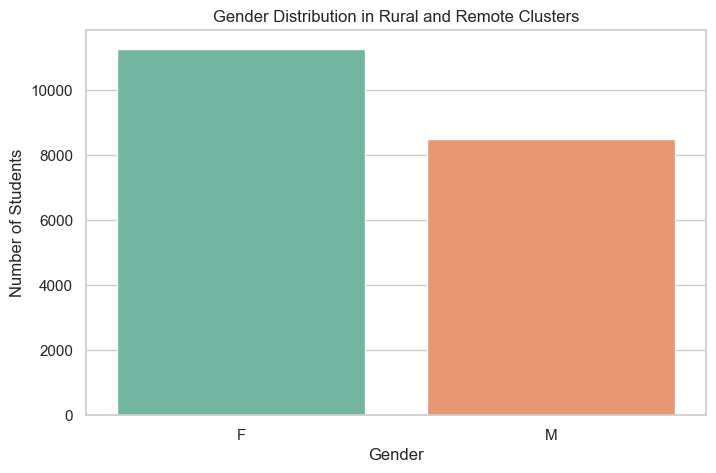

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ge', palette='Set2')
plt.title('Gender Distribution in Rural and Remote Clusters')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8624\422721069.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


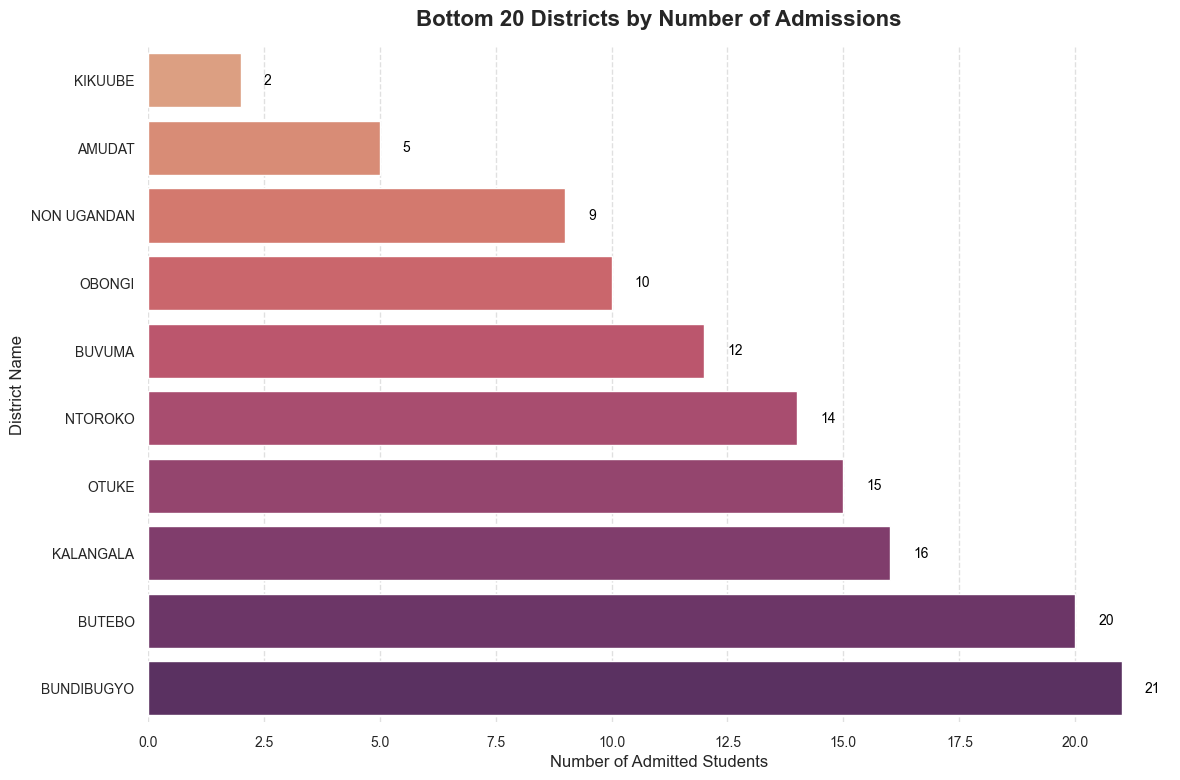

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize and clean district names
df['dname'] = df['dname'].astype(str).str.strip().str.upper()

# Set aesthetic style
sns.set(style='whitegrid', font_scale=1.1)

# Get bottom 20 districts by admission count
least_favoured = df['dname'].value_counts().nsmallest(10).sort_values()

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x=least_favoured.values, 
    y=least_favoured.index, 
    palette='flare'
)

# Add annotations on bars
for index, value in enumerate(least_favoured.values):
    barplot.text(value + 0.5, index, str(int(value)), va='center', fontsize=10, color='black')

# Titles and labels
plt.title('Bottom 20 Districts by Number of Admissions', fontsize=16, weight='bold', pad=15)
plt.xlabel('Number of Admitted Students', fontsize=12)
plt.ylabel('District Name', fontsize=12)

# Style tweaks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## Gender-wise Average Performance

C:\Users\User\AppData\Local\Temp\ipykernel_8624\1969087580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')


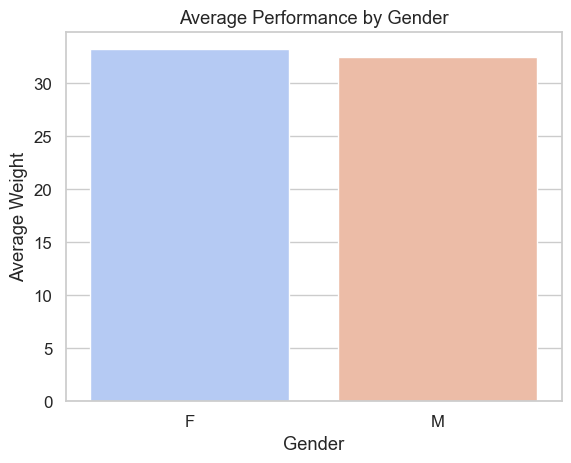

In [ ]:
avg_perf = df.groupby('ge')['tot_wt'].mean().reset_index()
sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weight')
plt.show()

## Top 10 Districts (by Student Count)

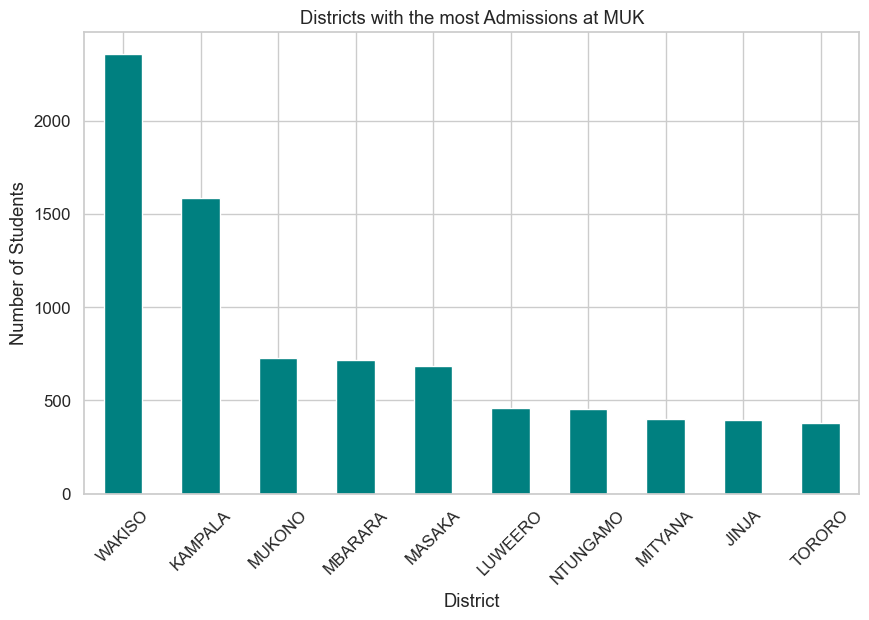

In [ ]:
top_districts = df['dname'].value_counts().head(10)
top_districts.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Districts with the most Admissions at MUK')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

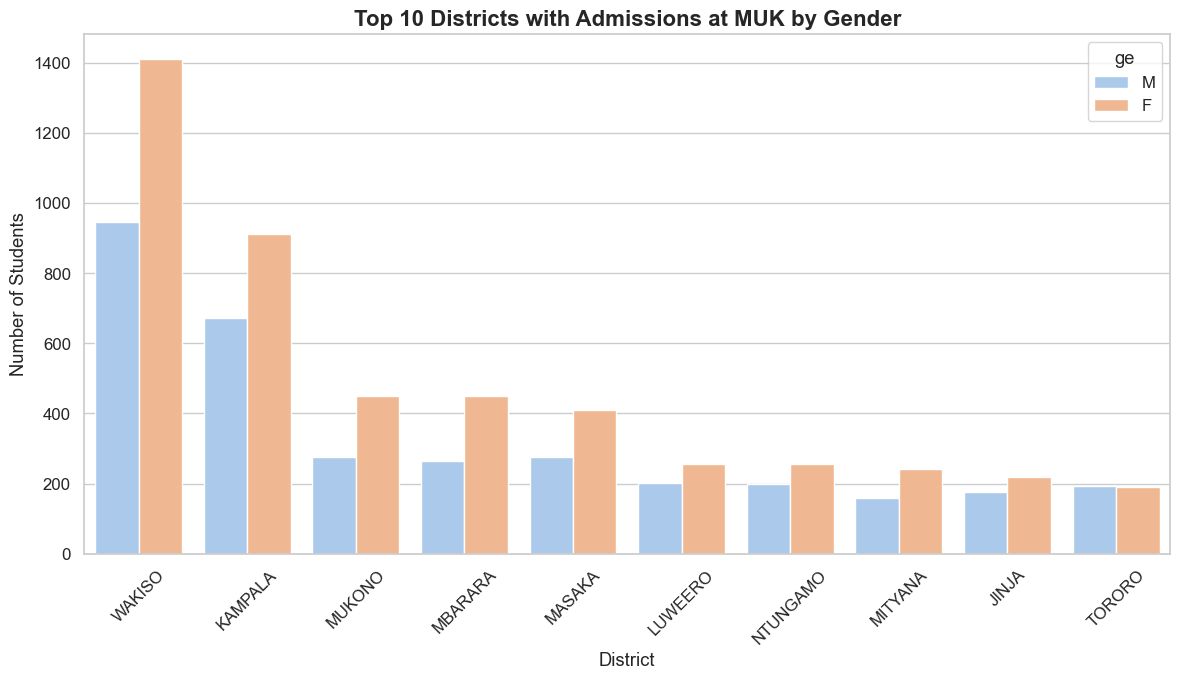

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Identify top 10 districts by total admissions
top_districts = df['dname'].value_counts().head(10).index

# Filter data to include only those districts
filtered_df = df[df['dname'].isin(top_districts)]

# Group by district and gender
gender_counts = filtered_df.groupby(['dname', 'ge']).size().reset_index(name='count')

# Sort districts in consistent order
gender_counts['dname'] = pd.Categorical(gender_counts['dname'], categories=top_districts, ordered=True)
gender_counts = gender_counts.sort_values('dname')

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_counts,
    x='dname',
    y='count',
    hue='ge',
    palette='pastel'
)

# Labels and title
plt.title('Top 10 Districts with Admissions at MUK by Gender', fontsize=16, weight='bold')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.legend(title='ge')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1245795425.py:37: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


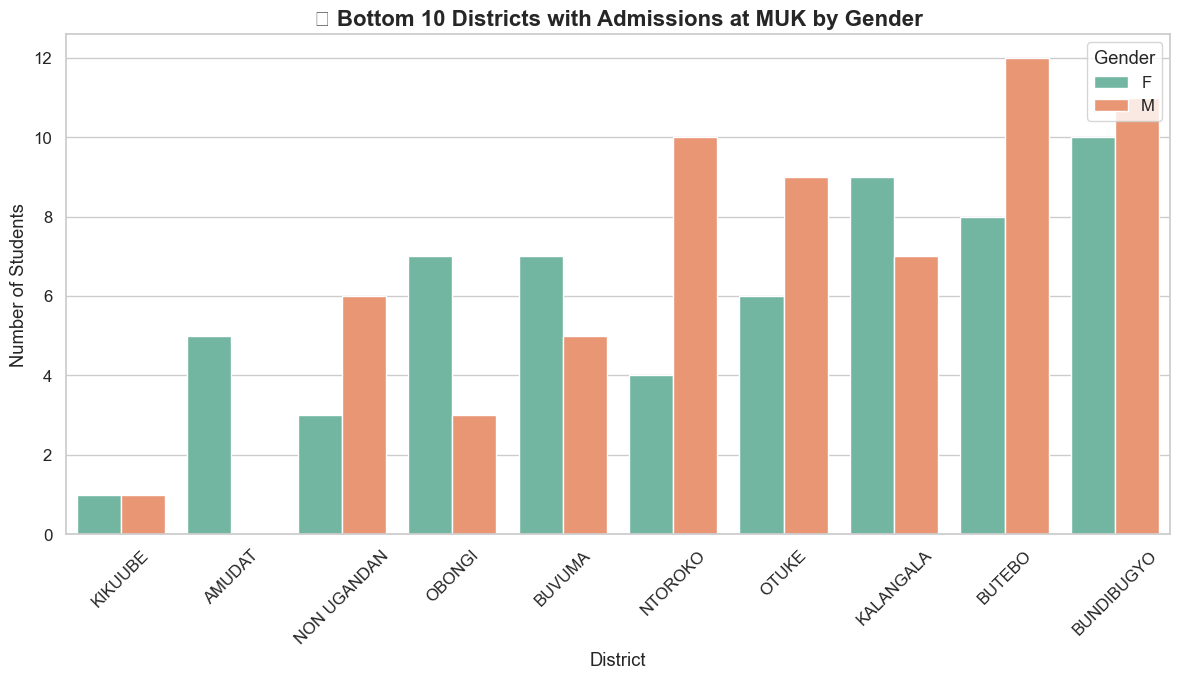

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Identify bottom 10 districts by total admissions
bottom_districts = df['dname'].value_counts().nsmallest(10).index

# Filter dataset
filtered_bottom = df[df['dname'].isin(bottom_districts)]

# Group by district and gender
gender_bottom = filtered_bottom.groupby(['dname', 'ge']).size().reset_index(name='count')

# Sort districts to maintain order in plot
gender_bottom['dname'] = pd.Categorical(gender_bottom['dname'], categories=bottom_districts, ordered=True)
gender_bottom = gender_bottom.sort_values('dname')

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_bottom,
    x='dname',
    y='count',
    hue='ge',
    palette='Set2'
)

# Titles and labels
plt.title('📉 Bottom 10 Districts with Admissions at MUK by Gender', fontsize=16, weight='bold')
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


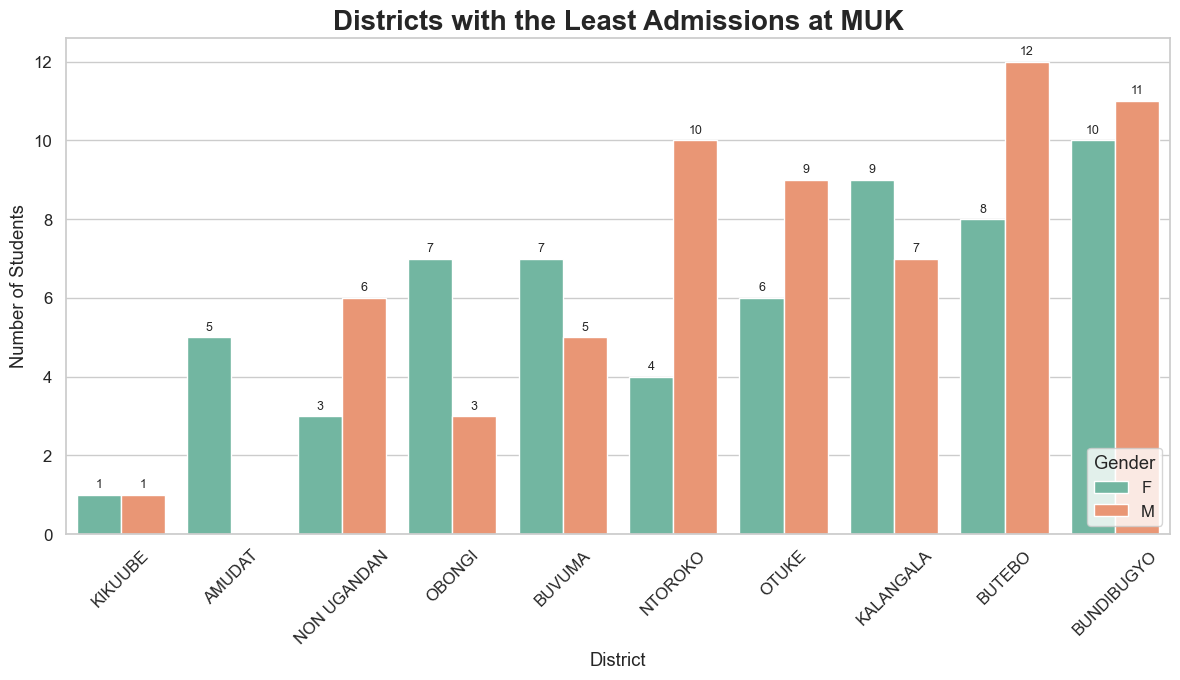

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Get bottom 10 districts by total admissions
bottom_districts = df['dname'].value_counts().nsmallest(10).index

# Filter dataset
filtered_bottom = df[df['dname'].isin(bottom_districts)]

# Group by district and gender
gender_bottom = (
    filtered_bottom
    .groupby(['dname', 'ge'])
    .size()
    .reset_index(name='count')
)

# Sort districts
gender_bottom['dname'] = pd.Categorical(gender_bottom['dname'], categories=bottom_districts, ordered=True)
gender_bottom = gender_bottom.sort_values('dname')

# Plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_bottom,
    x='dname',
    y='count',
    hue='ge',
    palette='Set2'
)

# Add value labels on bars
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Titles and labels
plt.title('Districts with the Least Admissions at MUK', fontsize=20, weight='bold')
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='lower right')
plt.tight_layout()
plt.show()


## Districts with Highest Average Performance

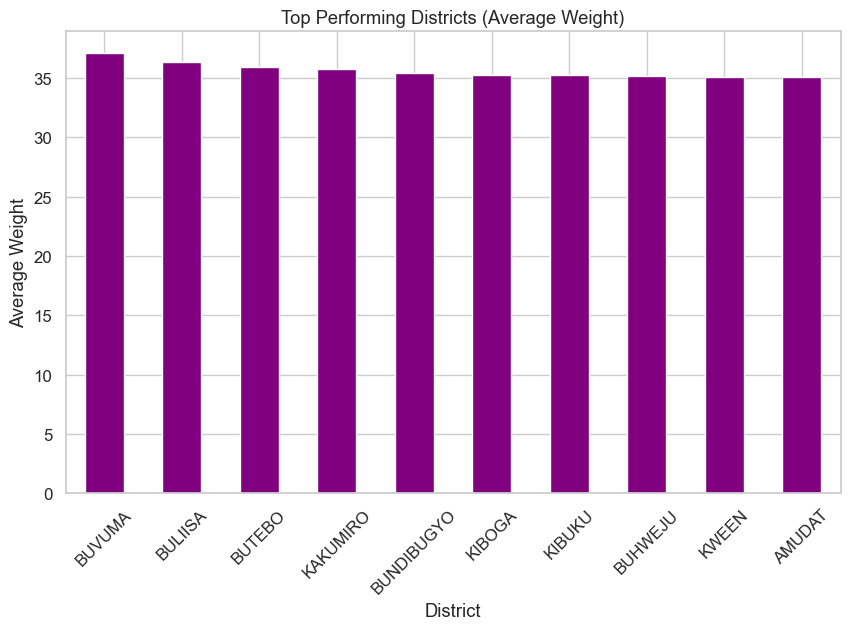

In [ ]:
district_perf = df.groupby('dname')['tot_wt'].mean().sort_values(ascending=False).head(10)
district_perf.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top Performing Districts (Average Weight)')
plt.ylabel('Average Weight')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

## College Preferences of Rural & Remote Students

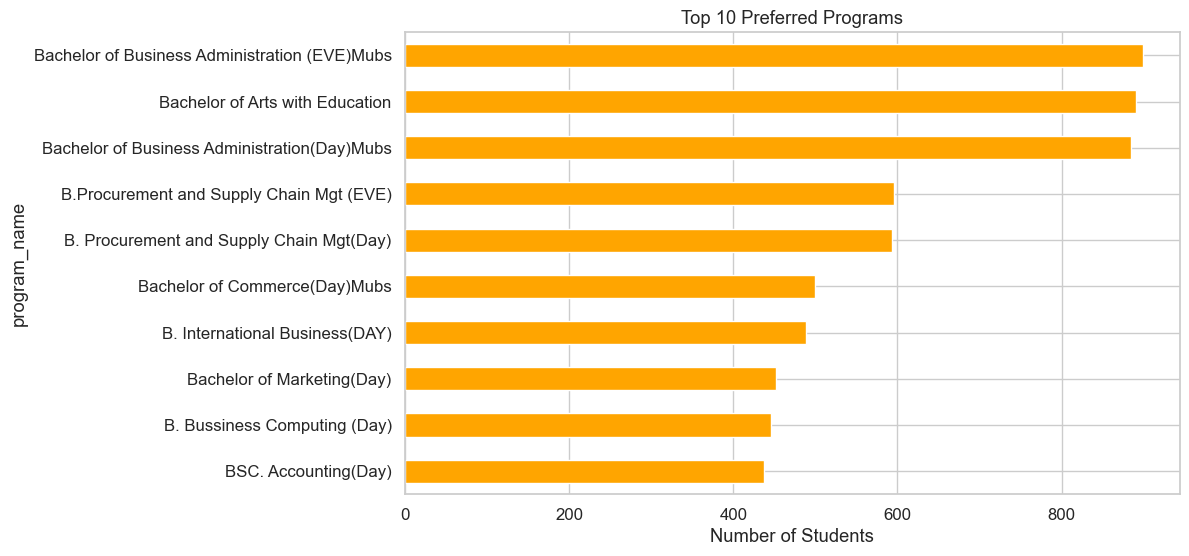

In [ ]:
college_pref = df['program_name'].value_counts().head(10)
college_pref.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Top 10 Preferred Programs')
plt.xlabel('Number of Students')
plt.gca().invert_yaxis()
plt.show()

## Interactive Gender vs Program Heatmap

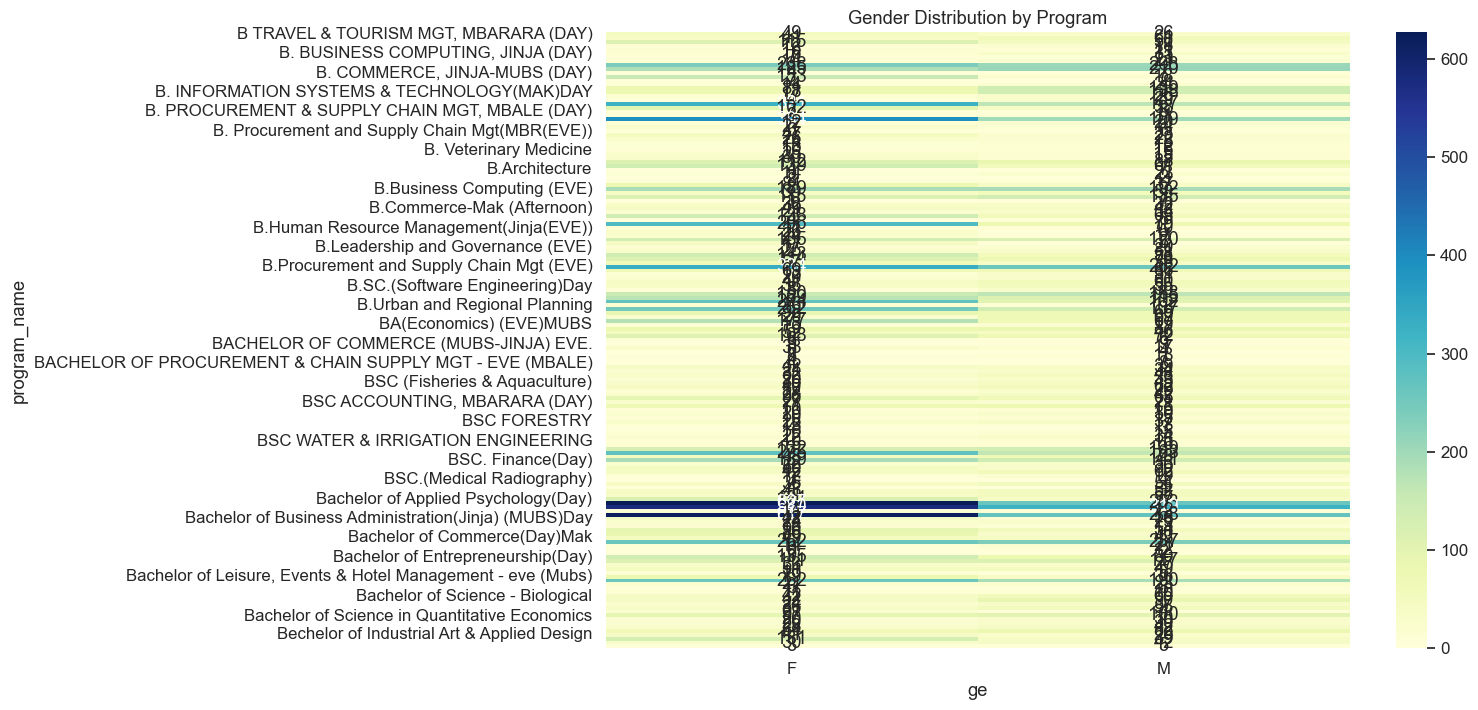

In [ ]:
cross = df.groupby(['program_name', 'ge']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(cross, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Gender Distribution by Program')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8624\25569456.py:25: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


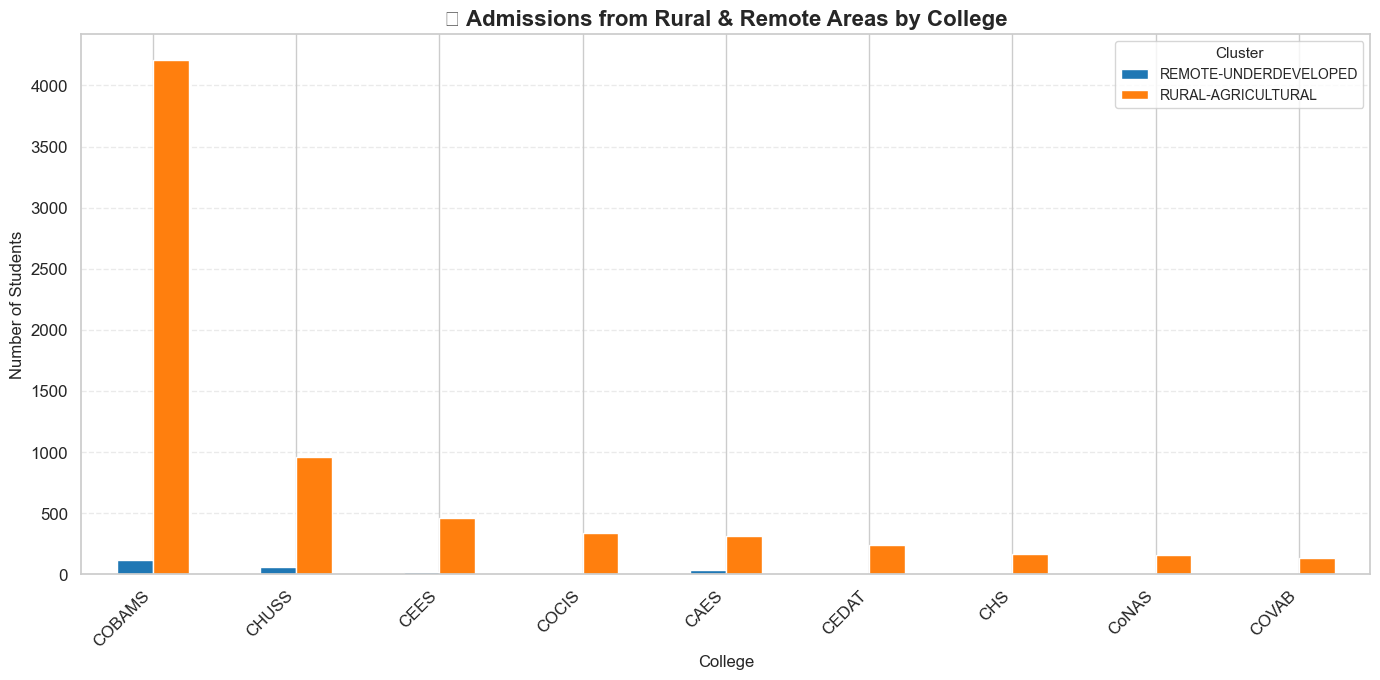

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to only rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Count by college and cluster
college_cluster_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Sort by total admissions to highlight major colleges
college_cluster_counts['Total'] = college_cluster_counts.sum(axis=1)
college_cluster_counts = college_cluster_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot
plt.figure(figsize=(12, 7))
college_cluster_counts.plot(kind='bar', stacked=False, figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

# Aesthetics
plt.title("🎓 Admissions from Rural & Remote Areas by College", fontsize=16, weight='bold')
plt.xlabel("College", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Cluster", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1532557435.py:24: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


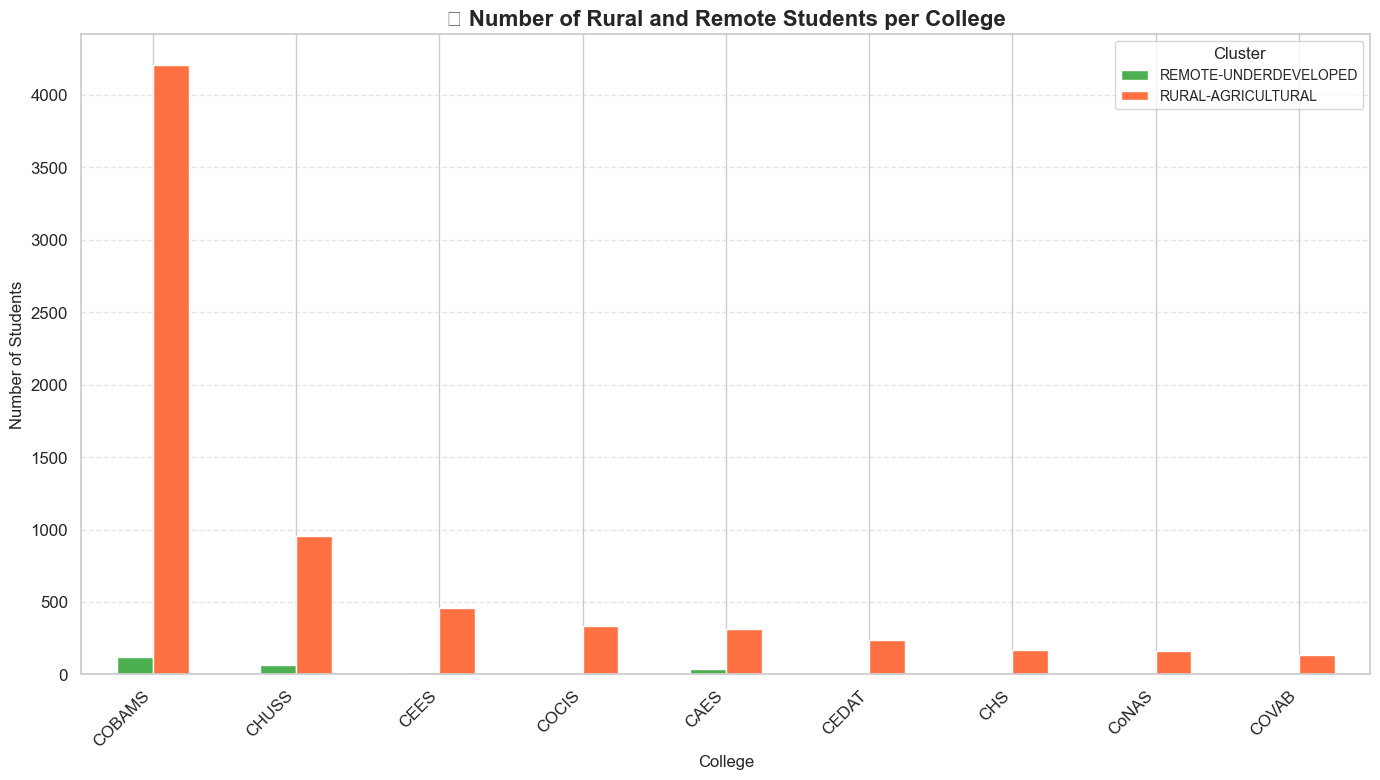

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group by college and cluster, then count
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Sort by total students in rural + remote
college_counts['Total'] = college_counts.sum(axis=1)
college_counts = college_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot
plt.figure(figsize=(14, 8))
college_counts.plot(kind='bar', stacked=False, color=['#4CAF50', '#FF7043'], figsize=(14, 8))

plt.title('🎓 Number of Rural and Remote Students per College', fontsize=16, weight='bold')
plt.xlabel('College', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', title_fontsize=12, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1400x900 with 0 Axes>

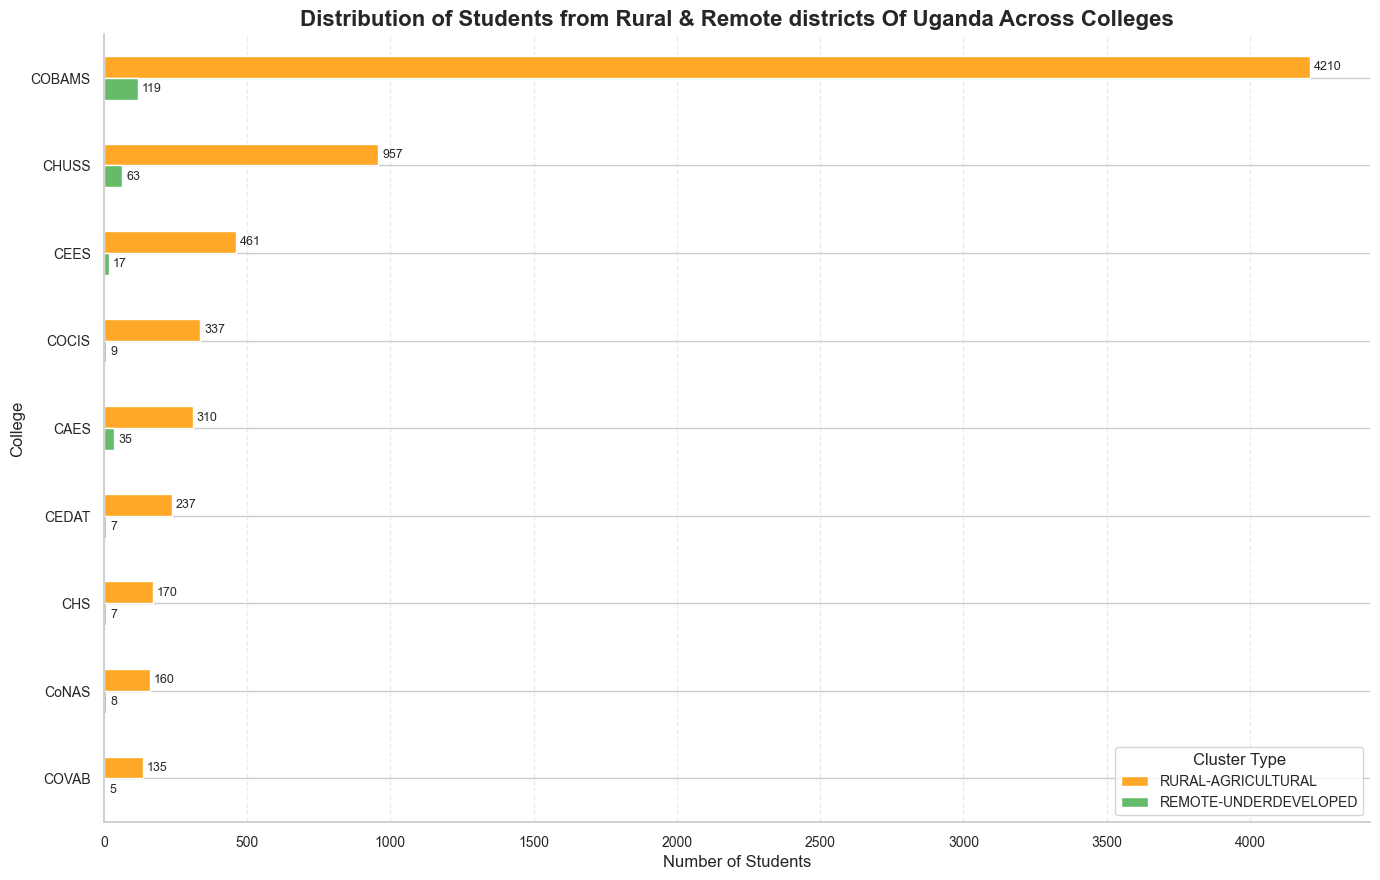

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group and pivot
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Ensure column order: RURAL on top, REMOTE below
college_counts = college_counts[['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED']]

# Sort by total and drop total column
college_counts['Total'] = college_counts.sum(axis=1)
college_counts = college_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot grouped bar chart
plt.figure(figsize=(14, 9))
ax = college_counts.plot(
    kind='barh',
    stacked=False,
    color=['#FFA726','#66BB6A'],  # Rural: green, Remote: orange
    figsize=(14, 9)
)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

# Customize
plt.title('Distribution of Students from Rural & Remote districts Of Uganda Across Colleges', fontsize=16, weight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('College', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().invert_yaxis()
sns.despine()

# Set legend to bottom right
plt.legend(
    title='Cluster Type',
    fontsize=10,
    title_fontsize=12,
    loc='lower right',
    bbox_to_anchor=(1, 0)
)

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


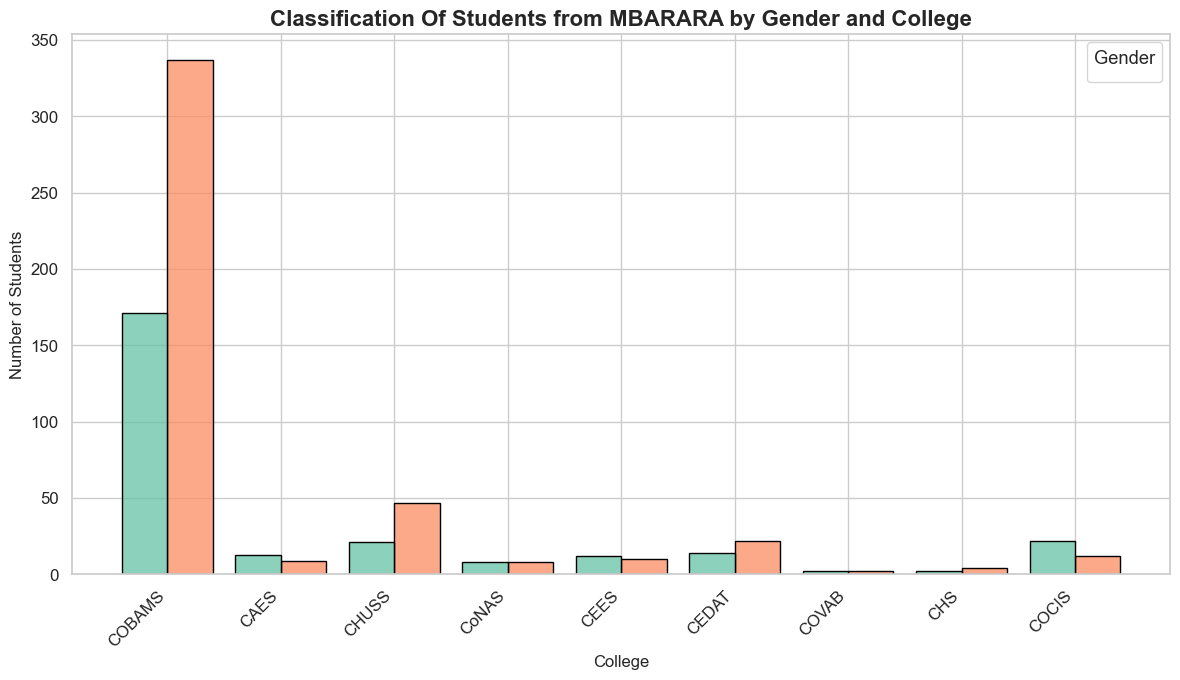

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter MBARARA students
mbarara_df = df[df['dname'].str.upper() == 'MBARARA']

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Plot histogram (bar plot grouped by gender and college)
plt.figure(figsize=(12, 7))
sns.histplot(
    data=mbarara_df,
    x='college',
    hue='ge',
    multiple='dodge',
    shrink=0.8,
    palette='Set2',
    edgecolor='black',
    discrete=True
)

# Titles and labels
plt.title('Classification Of Students from MBARARA by Gender and College', fontsize=16, weight='bold')
plt.xlabel('College', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Customize
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1444065154.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


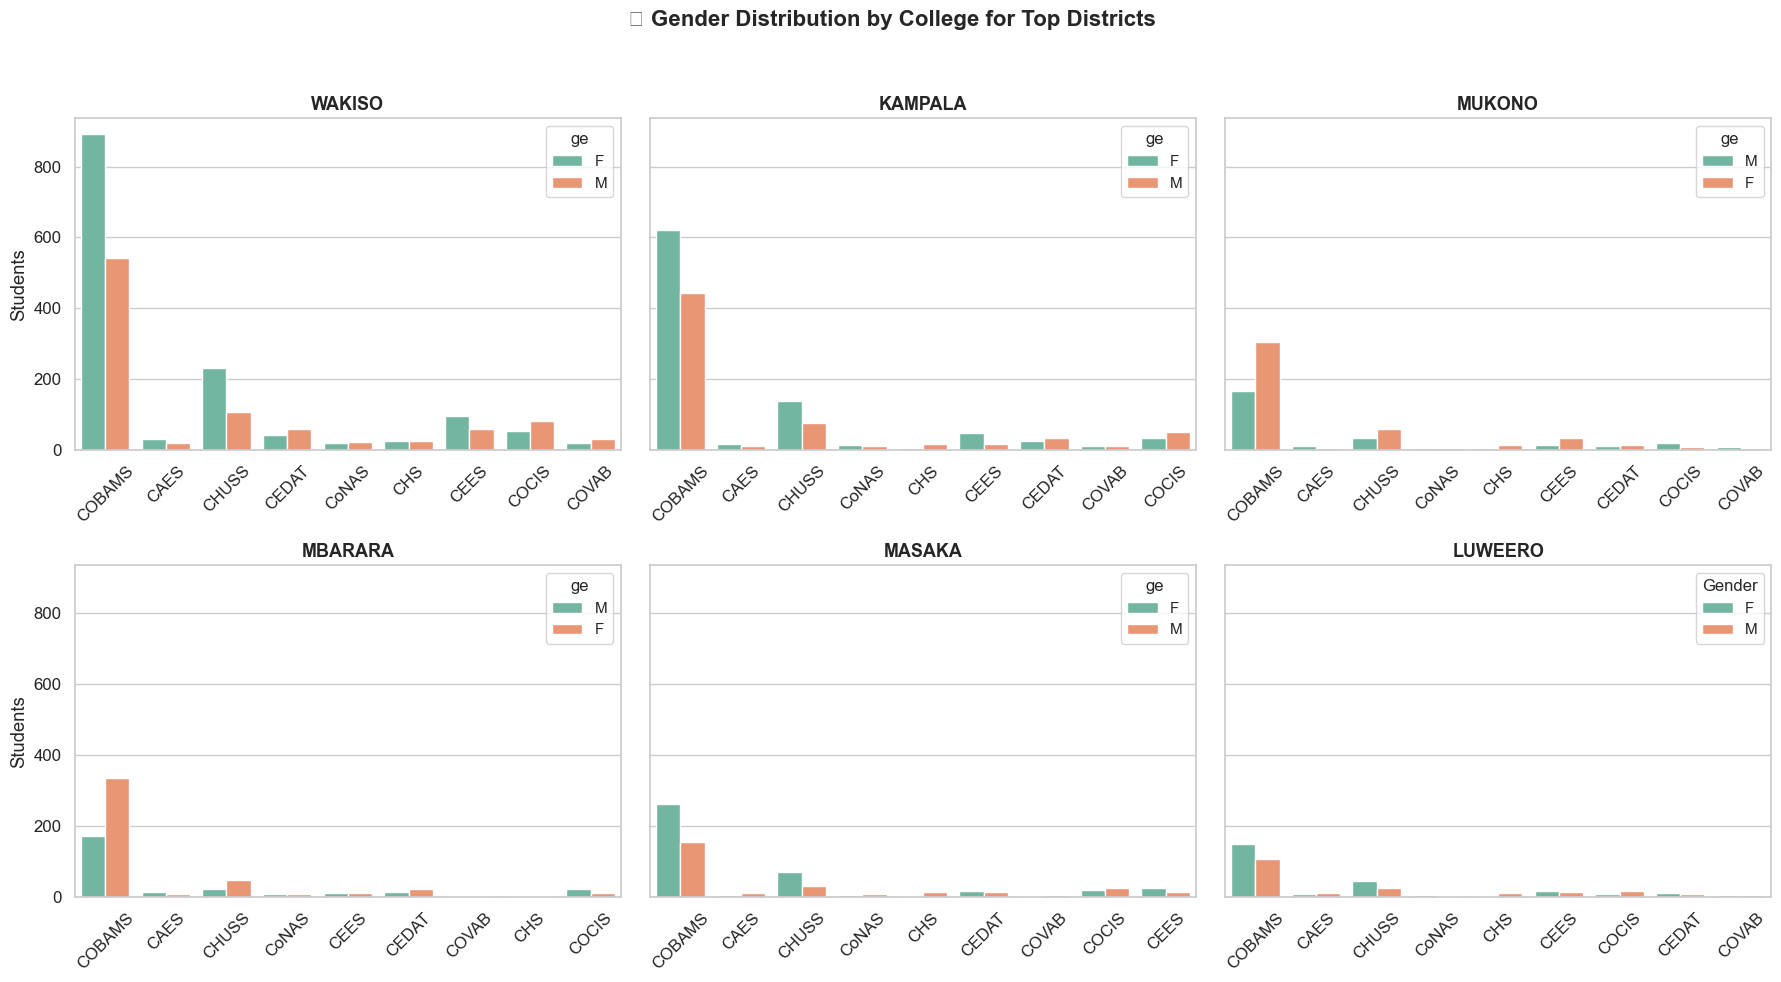

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 6 districts by number of students
top_districts = df['dname'].value_counts().head(6).index.tolist()

# Filter to those districts
top_df = df[df['dname'].isin(top_districts)]

# Set up subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

sns.set(style="whitegrid", font_scale=1)

# Plot each district
for i, district in enumerate(top_districts):
    sub_df = top_df[top_df['dname'] == district]
    sns.countplot(
        data=sub_df,
        x='college',
        hue='ge',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f"{district}", fontsize=13, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Students')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("📊 Gender Distribution by College for Top Districts", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(title='Gender')
plt.show()


In [ ]:
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px
import pandas as pd

# Filter relevant columns
filtered_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])].copy()
filtered_df = filtered_df[filtered_df['college'].notna() & filtered_df['dname'].notna()]

# List of unique districts
districts = sorted(filtered_df['dname'].unique())

# Initial figure for the first district
initial_district = districts[0]
fig = px.histogram(
    filtered_df[filtered_df['dname'] == initial_district],
    x='college',
    color='ge',
    barmode='group',
    title=f'Gender Distribution by College for {initial_district}',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Create dropdown buttons
dropdown_buttons = []
for district in districts:
    filtered = filtered_df[filtered_df['dname'] == district]
    hist = px.histogram(
        filtered,
        x='college',
        color='ge',
        barmode='group',
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    dropdown_buttons.append(dict(
        method='restyle',
        label=district,
        args=[
            {'x': [filtered['college']],
             'type': 'histogram'},
            [0]
        ],
    ))

# Update figure layout with dropdown
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.2,
        y=1.15,
        xanchor='right',
        yanchor='top'
    )],
    title='👥 Gender Distribution by College (Select District)',
    xaxis_title='College',
    yaxis_title='Number of Students',
    legend_title='Gender',
    height=500
)

fig.show()


In [ ]:
%pip install nbformat --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px

districts = df['dname'].dropna().unique()

fig = px.histogram(
    df[df['dname'] == districts[0]],  # default
    x='college',
    color='ge',
    barmode='group',
    title='Gender Distribution per College - Interactive'
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label=d,
                     method='update',
                     args=[
                         {'x': [df[df['dname'] == d]['college']],
                          'y': [df[df['dname'] == d]['ge']],
                          'type': 'histogram'},
                         {'title': f'Gender Distribution in {d}'}
                     ]) for d in districts
            ],
            direction="down"
        )
    ]
)
fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1920847847.py:39: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.



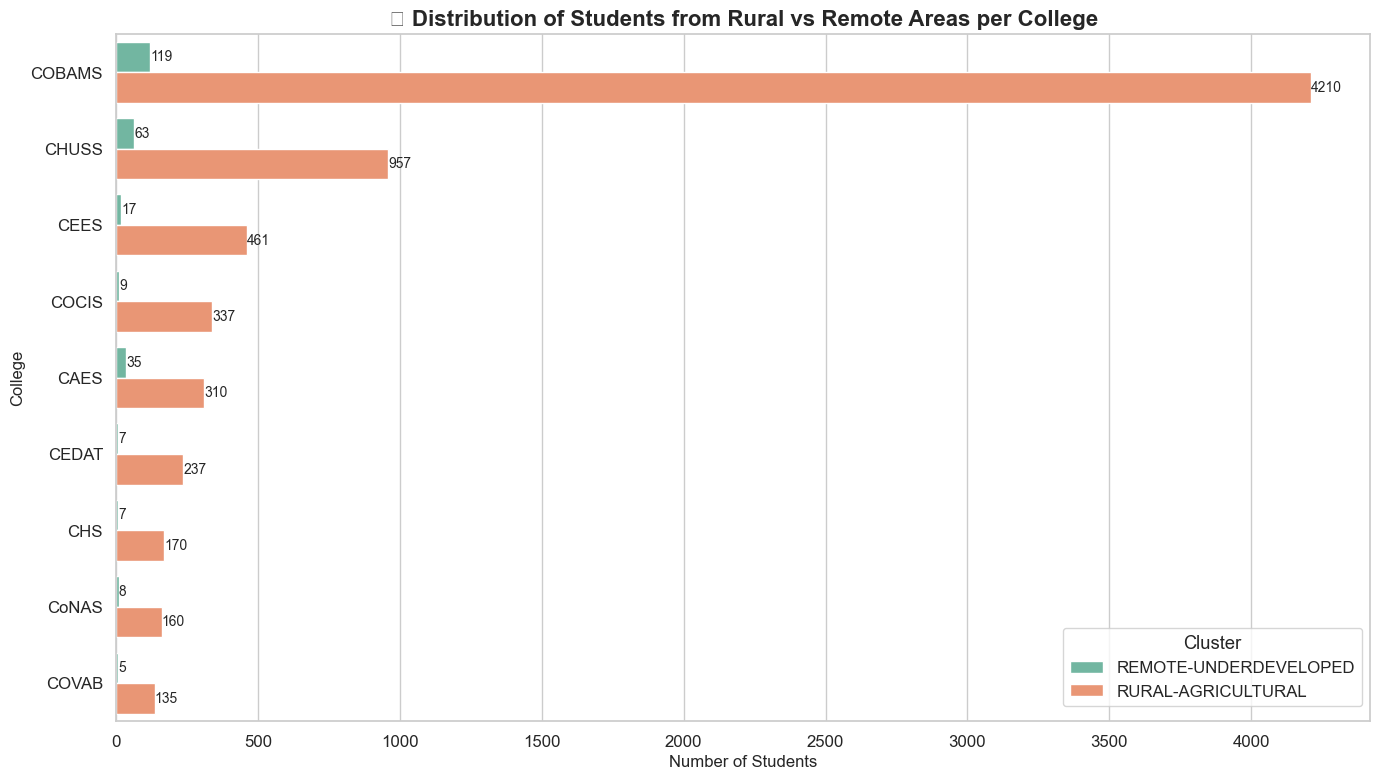

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group and count
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().reset_index(name='count')

# Sort colleges by total count (for consistent ordering)
sorted_colleges = college_counts.groupby('college')['count'].sum().sort_values(ascending=False).index
college_counts['college'] = pd.Categorical(college_counts['college'], categories=sorted_colleges, ordered=True)

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", font_scale=1.1)
barplot = sns.barplot(
    data=college_counts,
    x='count',
    y='college',
    hue='cluster',
    palette='Set2'
)

# Titles and labels
plt.title('🎓 Distribution of Students from Rural vs Remote Areas per College', fontsize=16, weight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('College', fontsize=12)

# Annotate bars
for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        barplot.text(width + 1, p.get_y() + p.get_height() / 2, int(width), va='center', fontsize=10)

# Legend at bottom right
plt.legend(title='Cluster', loc='lower right', bbox_to_anchor=(1.0, 0.01))
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Group and count admissions per district and region
region_district_counts = df.groupby(['region', 'dname']).size().reset_index(name='admissions')

# Create the treemap
fig = px.treemap(
    region_district_counts,
    path=['region', 'dname'],  # Hierarchical levels: Region > District
    values='admissions',
    color='region',
    title='📦 Admissions Treemap: Districts by Region',
    color_discrete_sequence=px.colors.qualitative.Set3  # You can try other color sets like Set2, Pastel1, etc.
)

# Display the treemap
fig.update_traces(textinfo='label+value')
fig.show()


In [ ]:
%pip install nbformat --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


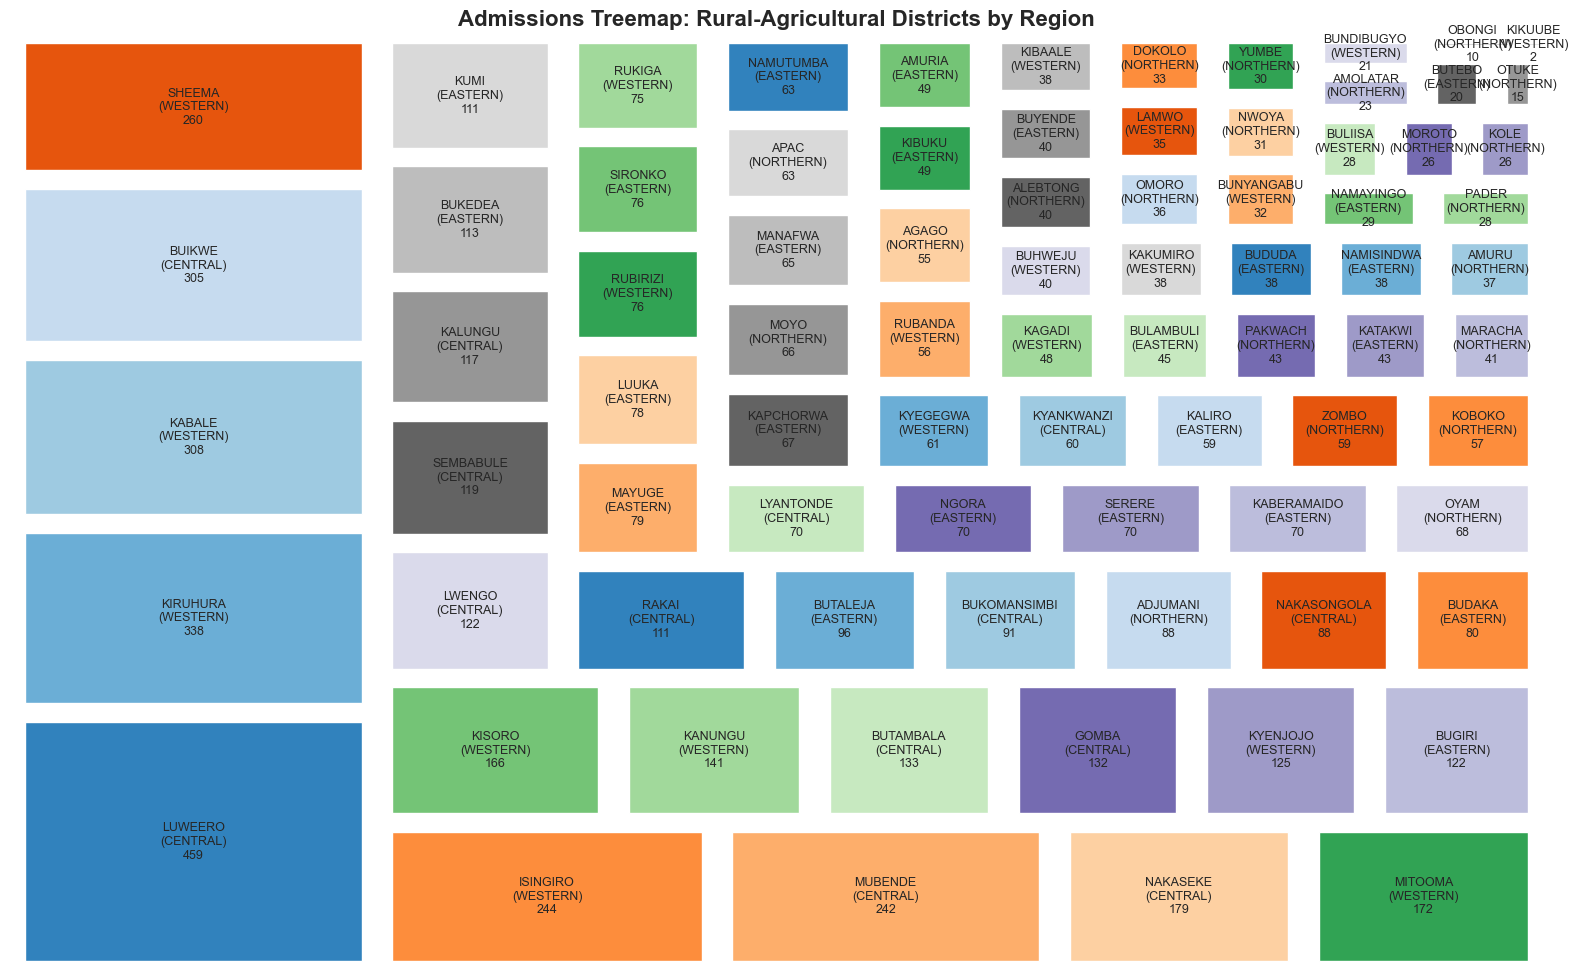

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Filter Rural-Agricultural cluster
rural_df = df[df['cluster'] == 'RURAL-AGRICULTURAL']
rural_counts = rural_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
rural_counts = rural_counts.sort_values(by='admissions', ascending=False)

# Generate labels
rural_counts['label'] = rural_counts['dname'] + "\n(" + rural_counts['region'] + ")\n" + rural_counts['admissions'].astype(str)

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=rural_counts['admissions'],
    label=rural_counts['label'],
    color=plt.cm.tab20c.colors * 10,  # Extend color palette
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('Admissions Treemap: Rural-Agricultural Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Filter Remote-Underdeveloped cluster
remote_df = df[df['cluster'] == 'REMOTE-UNDERDEVELOPED']
remote_counts = remote_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
remote_counts = remote_counts.sort_values(by='admissions', ascending=False)

# Generate labels
remote_counts['label'] = remote_counts['dname'] + "\n(" + remote_counts['region'] + ")\n" + remote_counts['admissions'].astype(str)

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=remote_counts['admissions'],
    label=remote_counts['label'],
    color=plt.cm.PuBuGn.colors * 10,  # Different but soft palette
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('🏔️ Admissions Treemap: Remote-Underdeveloped Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

<Figure size 1600x1000 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3380900857.py:30: UserWarning:

Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3380900857.py:30: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



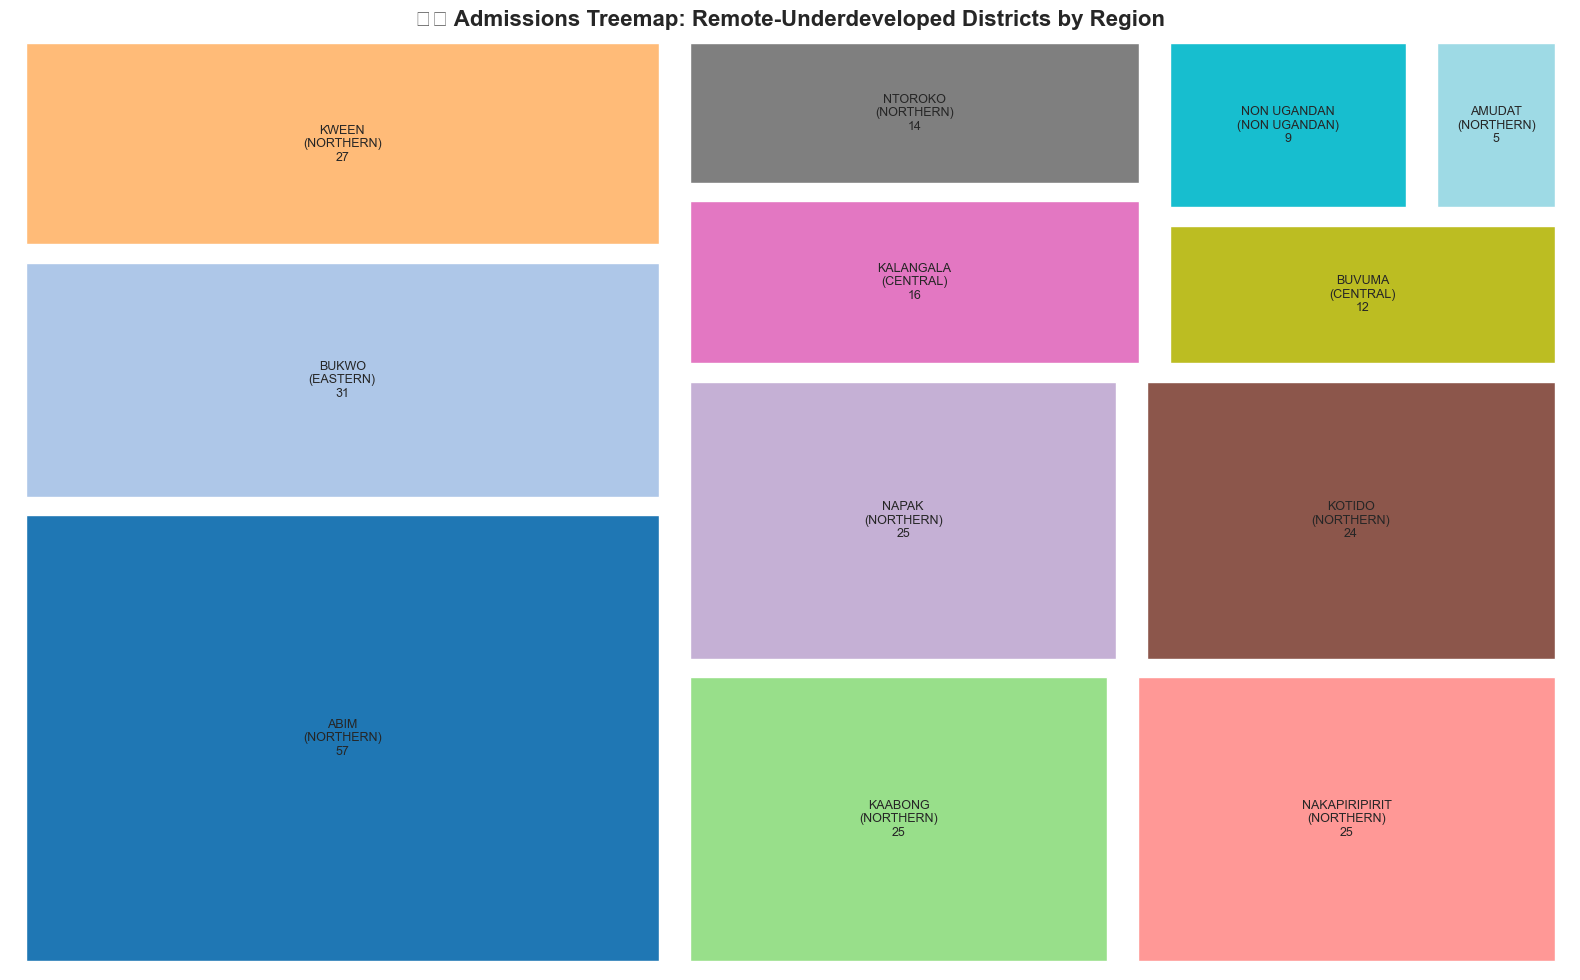

In [ ]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import numpy as np

# Filter Remote-Underdeveloped cluster
remote_df = df[df['cluster'] == 'REMOTE-UNDERDEVELOPED']
remote_counts = remote_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
remote_counts = remote_counts.sort_values(by='admissions', ascending=False)

# Generate labels
remote_counts['label'] = remote_counts['dname'] + "\n(" + remote_counts['region'] + ")\n" + remote_counts['admissions'].astype(str)

# Use a colorful, varied palette
color_count = len(remote_counts)
colors = plt.cm.tab20(np.linspace(0, 1, color_count))  # tab20 gives 20 distinct colors, we can interpolate

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=remote_counts['admissions'],
    label=remote_counts['label'],
    color=colors,
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('Admissions Treemap: Remote-Underdeveloped Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\3739748973.py:27: UserWarning:

Glyph 127853 (\N{LOLLIPOP}) missing from current font.



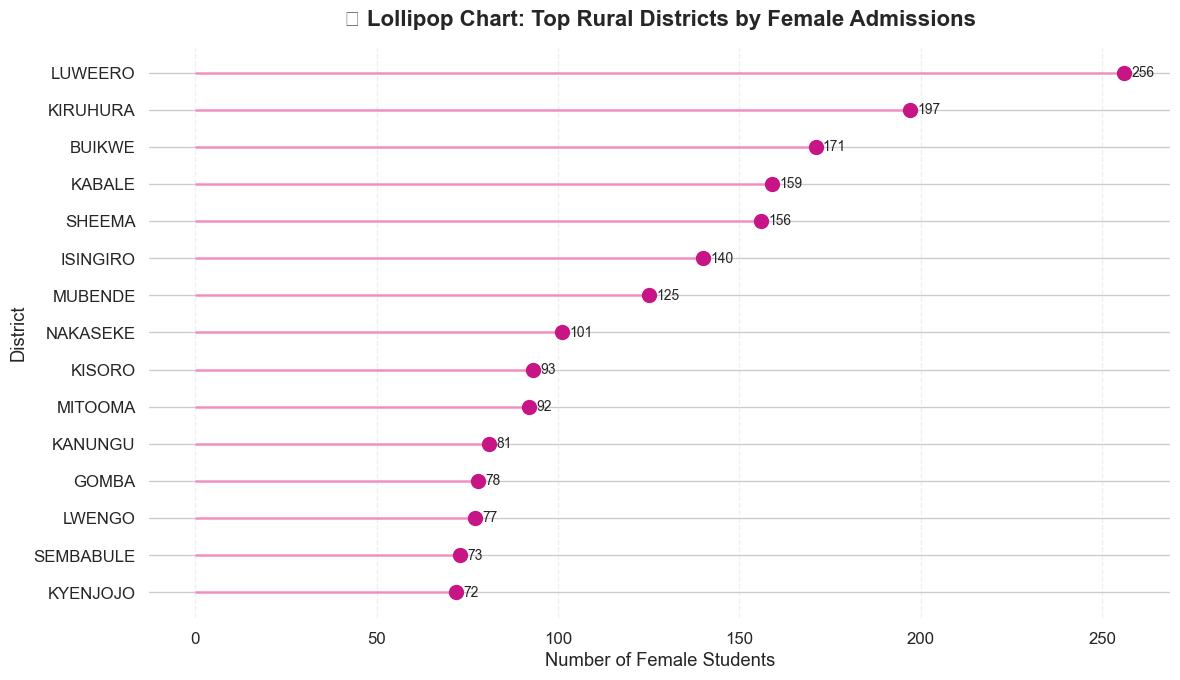

In [ ]:
import matplotlib.pyplot as plt

# Prepare sorted data
female_counts_sorted = female_counts.sort_values()

# Create figure
plt.figure(figsize=(12, 7))

# Plot the stem lines
plt.hlines(y=female_counts_sorted.index, xmin=0, xmax=female_counts_sorted.values, color='#FF69B4', alpha=0.6, linewidth=2)

# Plot the dots
plt.plot(female_counts_sorted.values, female_counts_sorted.index, "o", markersize=10, color='#C71585')

# Add value labels
for i, value in enumerate(female_counts_sorted.values):
    plt.text(value + 2, female_counts_sorted.index[i], str(value), va='center', fontsize=10)

# Titles and labels
plt.title('🍭 Lollipop Chart: Top Rural Districts by Female Admissions', fontsize=16, weight='bold', pad=15)
plt.xlabel('Number of Female Students')
plt.ylabel('District')

# Aesthetic tweaks
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\3473299695.py:34: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.



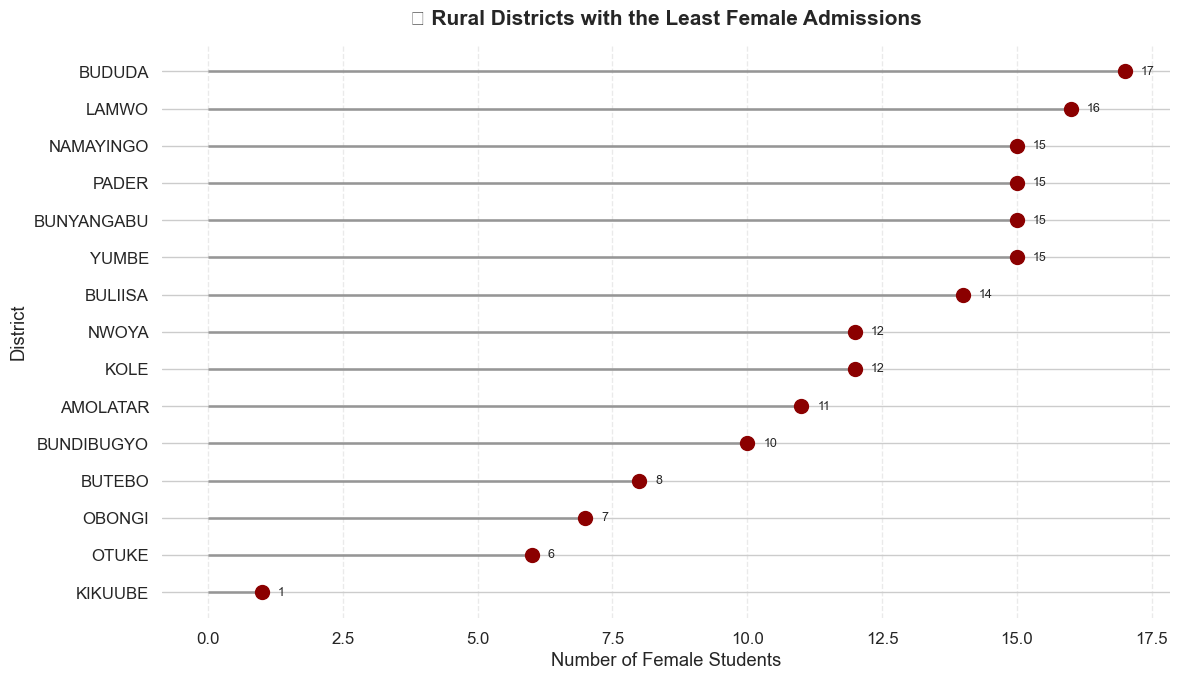

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for rural districts and female students
rural_female_df = df[
    (df['cluster'] == 'RURAL-AGRICULTURAL') &
    (df['ge'].str.upper() == 'F')
]

# Count female admissions per rural district and get the bottom 15
least_female_counts = rural_female_df['dname'].value_counts().nsmallest(15).sort_values()

# Plot
plt.figure(figsize=(12, 7))
y_pos = range(len(least_female_counts))

# Draw stem lines
plt.hlines(y=y_pos, xmin=0, xmax=least_female_counts.values, color='gray', alpha=0.7, linewidth=2)

# Draw dots
plt.plot(least_female_counts.values, y_pos, "o", markersize=10, color='darkred')

# Add text labels
for i, value in enumerate(least_female_counts.values):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=9)

# Format plot
plt.yticks(y_pos, least_female_counts.index)
plt.title('🔍 Rural Districts with the Least Female Admissions', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Female Students')
plt.ylabel('District')
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 128104 (\N{MAN}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 128105 (\N{WOMAN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128104 (\N{MAN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128105 (\N{WOMAN}) missing from current font.



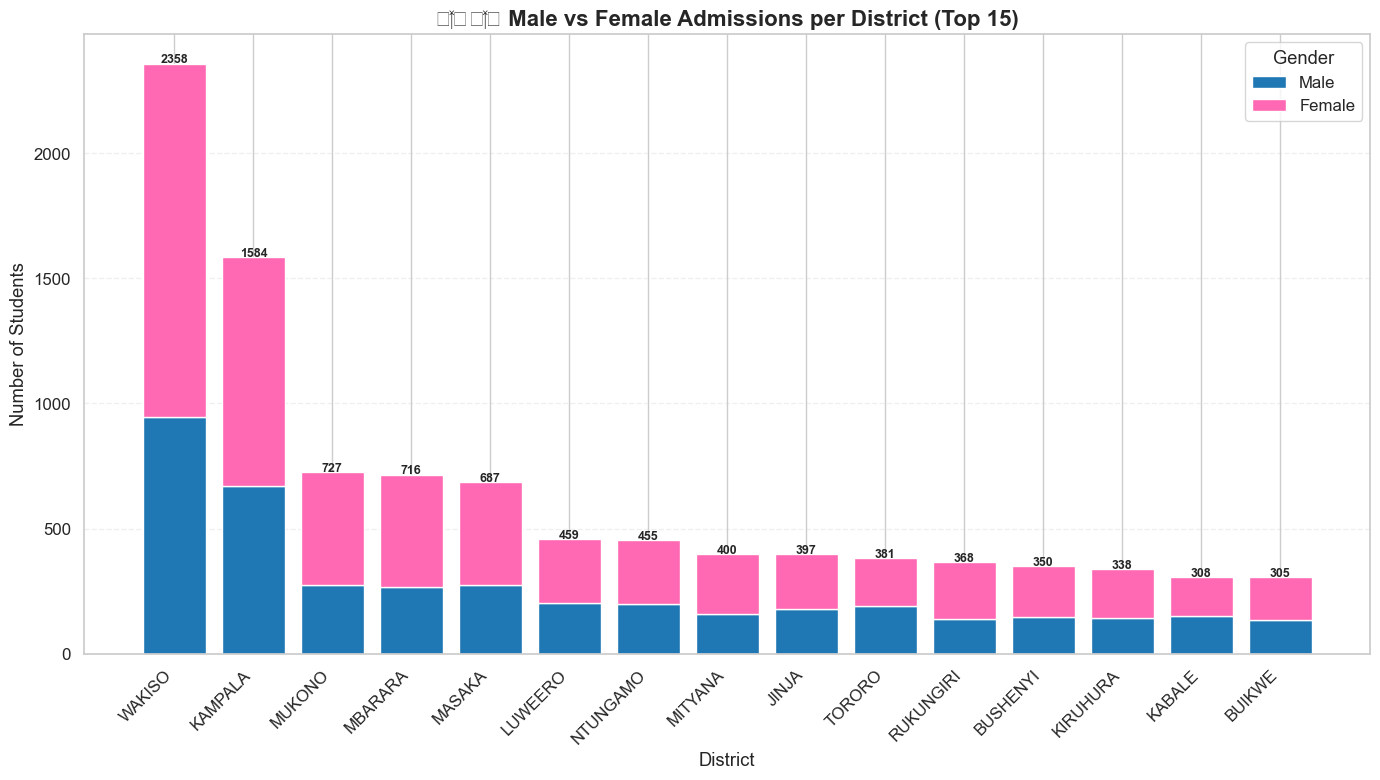

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate male and female counts per district
gender_counts = df.groupby(['dname', 'ge']).size().unstack(fill_value=0)

# Get top 15 districts by total admissions
top15 = gender_counts.sum(axis=1).sort_values(ascending=False).head(15)
gender_top15 = gender_counts.loc[top15.index]

# Plot
plt.figure(figsize=(14, 8))
bars_male = plt.bar(gender_top15.index, gender_top15.get('M', 0), label='Male', color='#1f77b4')
bars_female = plt.bar(gender_top15.index, gender_top15.get('F', 0), bottom=gender_top15.get('M', 0), label='Female', color='#ff69b4')

# Add value labels
for i in range(len(gender_top15)):
    total = gender_top15.iloc[i].sum()
    plt.text(i, total + 2, str(total), ha='center', fontsize=9, fontweight='bold')

# Styling
plt.title('👨‍🎓👩‍🎓 Male vs Female Admissions per District (Top 15)', fontsize=16, weight='bold')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2556916085.py:34: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



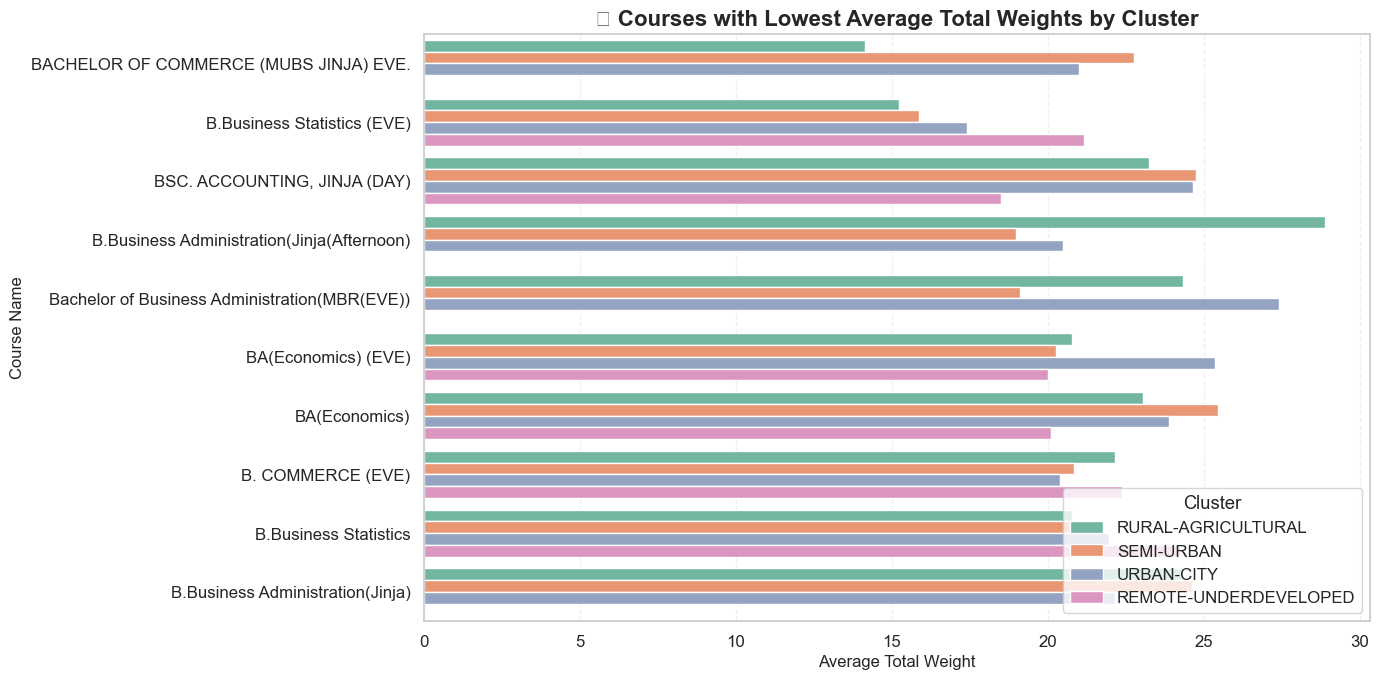

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid', font_scale=1.1)

# Group by course and cluster, and compute average total weight
course_cluster_avg = df.groupby(['course_name', 'cluster'])['tot_wt'].mean().reset_index()

# Get the 10 courses with the lowest average weight
lowest_courses = course_cluster_avg.groupby('course_name')['tot_wt'].mean().nsmallest(10).index
filtered_data = course_cluster_avg[course_cluster_avg['course_name'].isin(lowest_courses)]

# Sort for better visual order
filtered_data = filtered_data.sort_values(by='tot_wt', ascending=True)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=filtered_data,
    y='course_name',
    x='tot_wt',
    hue='cluster',
    palette='Set2'
)

# Title and labels
plt.title('📉 Courses with Lowest Average Total Weights by Cluster', fontsize=16, weight='bold')
plt.xlabel('Average Total Weight', fontsize=12)
plt.ylabel('Course Name', fontsize=12)
plt.legend(title='Cluster', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\476831082.py:41: UserWarning:

Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.



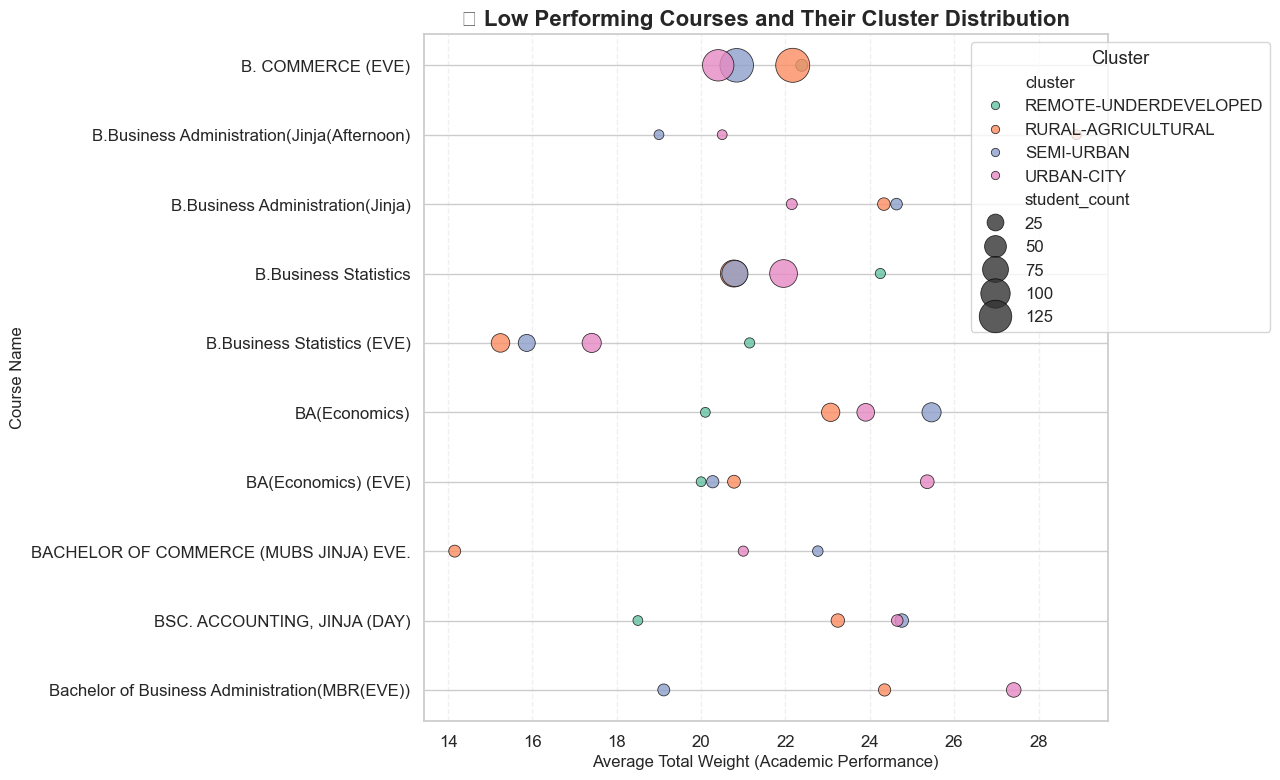

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by course and cluster, compute avg total weight and count
grouped = df.groupby(['course_name', 'cluster']).agg(
    avg_weight=('tot_wt', 'mean'),
    student_count=('tot_wt', 'count')
).reset_index()

# Step 2: Get bottom 10 courses with lowest avg total weight overall
lowest_courses = (
    grouped.groupby('course_name')['avg_weight'].mean()
    .nsmallest(10)
    .index
)

# Step 3: Filter data
filtered = grouped[grouped['course_name'].isin(lowest_courses)]

# Step 4: Plot - Bubble chart
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=filtered,
    x='avg_weight',
    y='course_name',
    size='student_count',
    hue='cluster',
    sizes=(50, 600),
    alpha=0.8,
    palette='Set2',
    edgecolor='black'
)

# Labels and formatting
plt.title('💡 Low Performing Courses and Their Cluster Distribution', fontsize=16, weight='bold')
plt.xlabel('Average Total Weight (Academic Performance)', fontsize=12)
plt.ylabel('Course Name', fontsize=12)
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\18092016.py:31: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from current font.



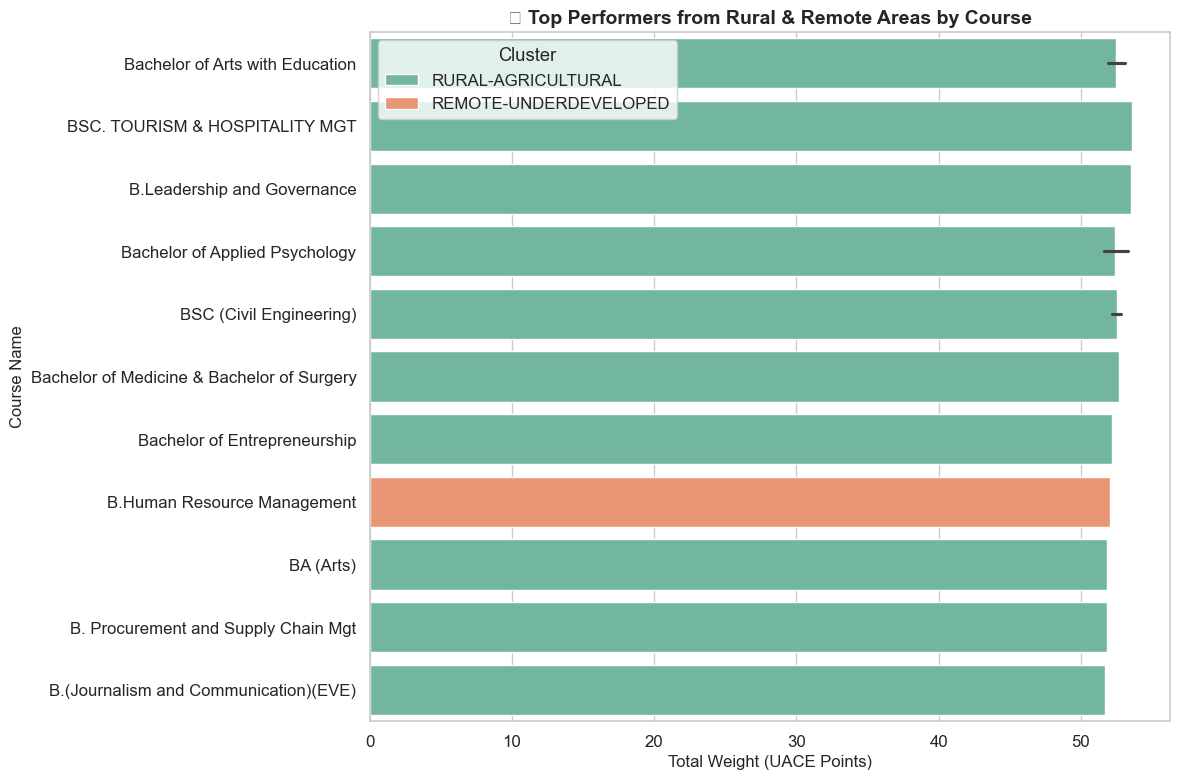

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (adjust path if needed)
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

# Filter for rural and remote clusters
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Remove any missing values in total weight or course
rural_remote_df = rural_remote_df[rural_remote_df['tot_wt'].notna() & rural_remote_df['course_name'].notna()]

# Get top 20 students with highest total weights
top_performers = rural_remote_df.sort_values(by='tot_wt', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_performers,
    x='tot_wt',
    y='course_name',
    hue='cluster',
    palette='Set2'
)

plt.title('🌟 Top Performers from Rural & Remote Areas by Course', fontsize=14, weight='bold')
plt.xlabel('Total Weight (UACE Points)', fontsize=12)
plt.ylabel('Course Name', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2331528722.py:31: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from current font.



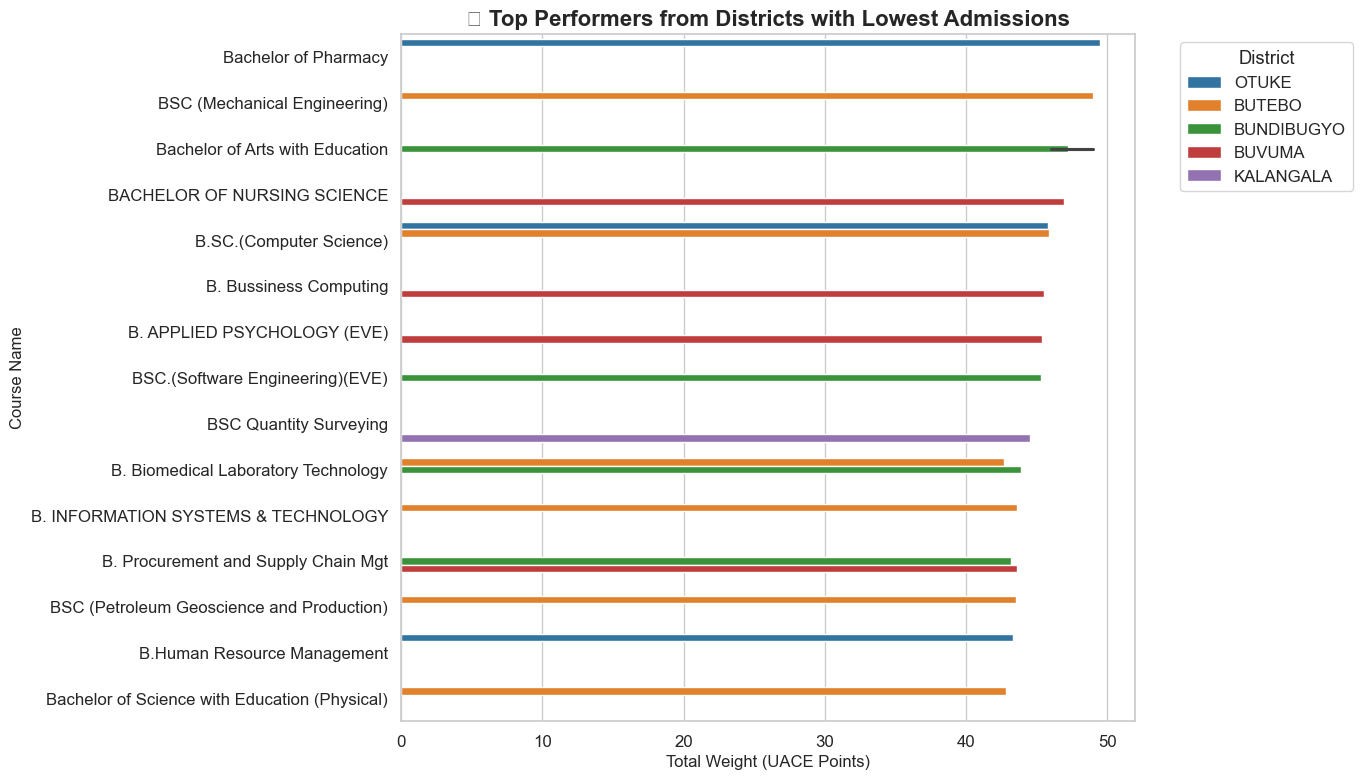

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

# Step 1: Identify bottom 10 districts by admission count
bottom_districts = df['dname'].value_counts().nsmallest(10).index

# Step 2: Filter data for students from those districts
low_admit_df = df[df['dname'].isin(bottom_districts)]

# Step 3: Filter top performers from those districts
top_performers_low_admit = low_admit_df.sort_values(by='tot_wt', ascending=False).head(20)

# Step 4: Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_performers_low_admit,
    x='tot_wt',
    y='course_name',
    hue='dname',
    palette='tab10'
)

plt.title('🎯 Top Performers from Districts with Lowest Admissions', fontsize=16, weight='bold')
plt.xlabel('Total Weight (UACE Points)', fontsize=12)
plt.ylabel('Course Name', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2327329216.py:42: UserWarning:

Glyph 127941 (\N{SPORTS MEDAL}) missing from current font.



<Figure size 1200x800 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127941 (\N{SPORTS MEDAL}) missing from current font.



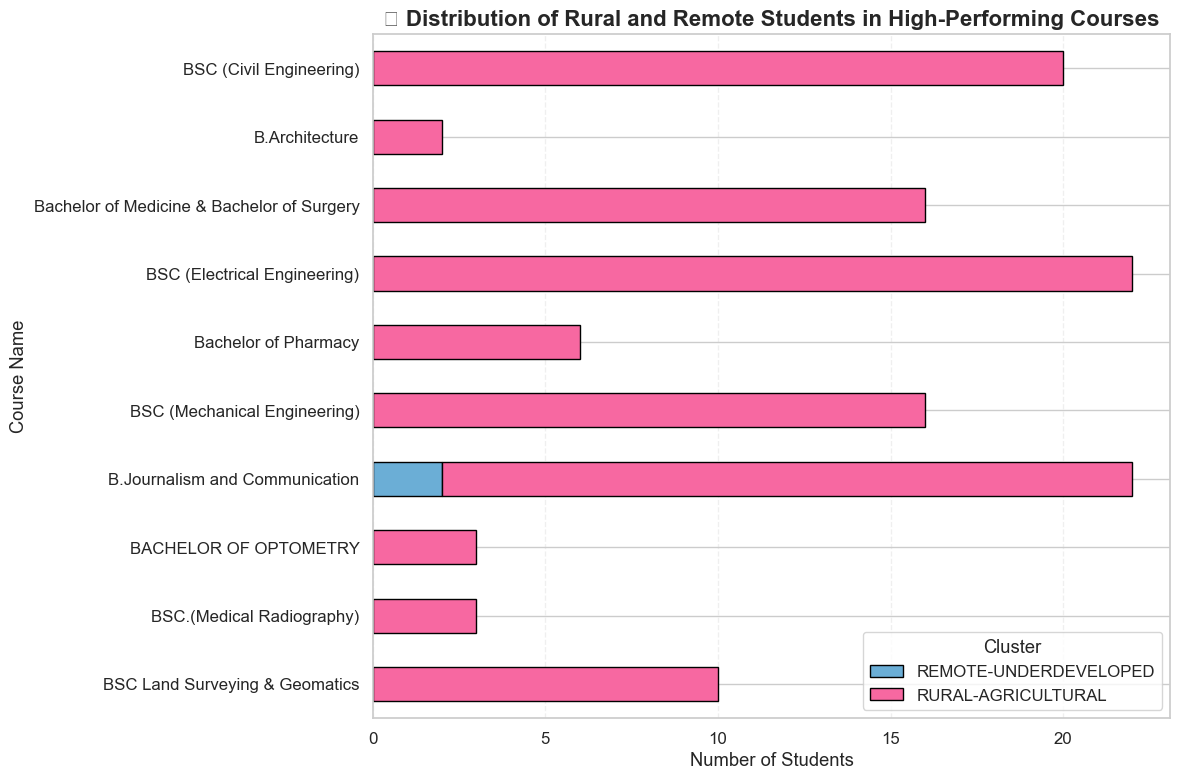

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Top 10 high-performing courses
top_courses = (
    df.groupby('course_name')['tot_wt']
    .mean()
    .nlargest(10)
    .index
)

# Step 2: Filter for top courses and only rural or remote students
rural_remote_df = df[
    (df['course_name'].isin(top_courses)) &
    (df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED']))
]

# Step 3: Count number of students per course and cluster
grouped = (
    rural_remote_df.groupby(['course_name', 'cluster'])
    .size()
    .unstack(fill_value=0)
    .loc[top_courses]  # maintain order
)

# Step 4: Plot
plt.figure(figsize=(12, 8))
grouped.plot(
    kind='barh',
    stacked=True,
    color=['#6BAED6', '#F768A1'],  # Soft blue for rural, pink for remote
    figsize=(12, 8),
    edgecolor='black'
)

# Formatting
plt.title('🏅 Distribution of Rural and Remote Students in High-Performing Courses', fontsize=16, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Course Name')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title='Cluster', loc='lower right')
plt.tight_layout()
plt.gca().invert_yaxis()  # Best-performing at the top
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1571300404.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1571300404.py:31: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from current font.



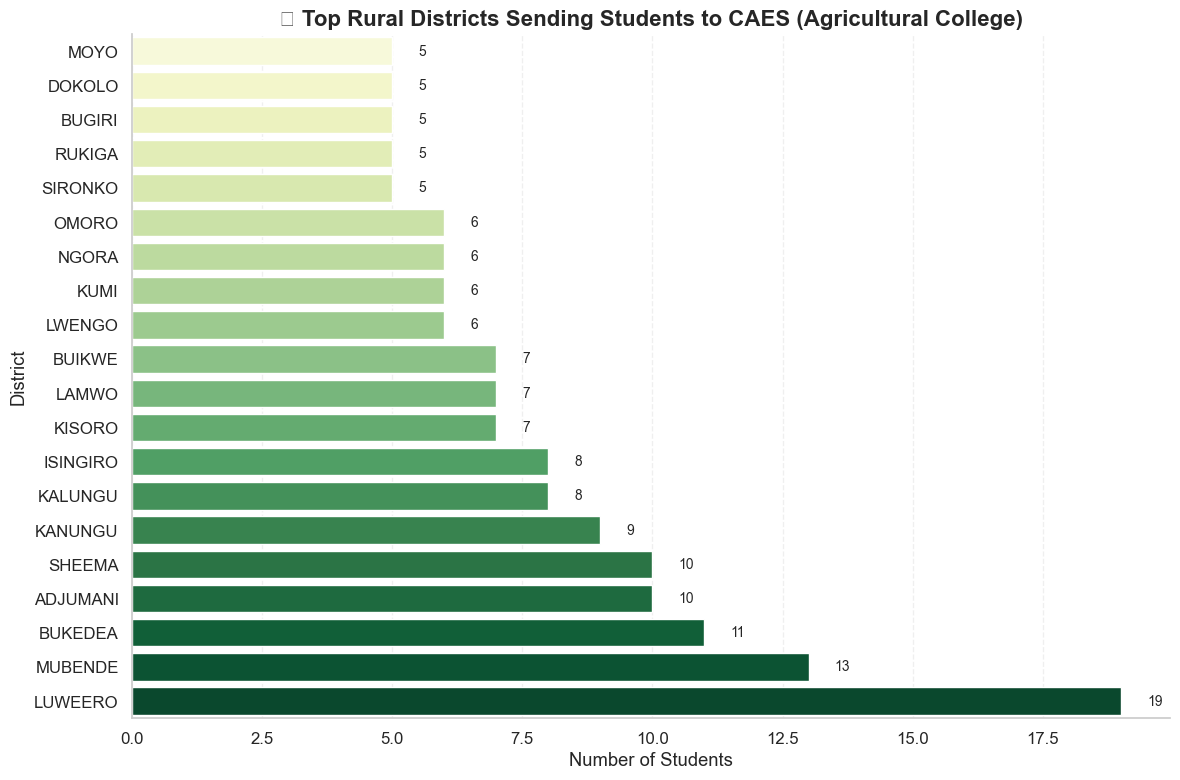

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter: Rural students at CAES
caes_rural_df = df[
    (df['cluster'] == 'RURAL-AGRICULTURAL') &
    (df['college'].str.upper() == 'CAES')
]

# Group by district
district_counts = caes_rural_df['dname'].value_counts().head(20).sort_values()

# Plot
plt.figure(figsize=(12, 8))
bar = sns.barplot(
    x=district_counts.values,
    y=district_counts.index,
    palette='YlGn'  # Green shades, suitable for agriculture
)

# Annotate bars
for i, value in enumerate(district_counts.values):
    bar.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Titles and style
plt.title('🌾 Top Rural Districts Sending Students to CAES (Agricultural College)', fontsize=16, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('District')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\211553734.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_8624\211553734.py:30: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.



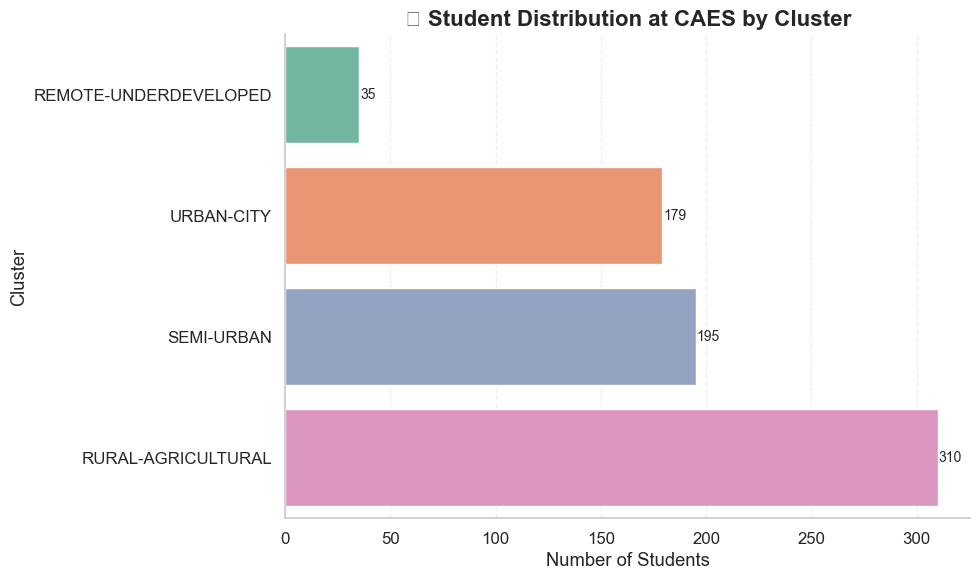

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for CAES college students
caes_df = df[df['college'].str.upper() == 'CAES']

# Group by cluster
cluster_counts = caes_df['cluster'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', len(cluster_counts))

bar = sns.barplot(
    x=cluster_counts.values,
    y=cluster_counts.index,
    palette=colors
)

# Add number labels
for i, value in enumerate(cluster_counts.values):
    bar.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Labels and formatting
plt.title('🌿 Student Distribution at CAES by Cluster', fontsize=16, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Cluster')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3861454501.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3861454501.py:30: UserWarning:

Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.



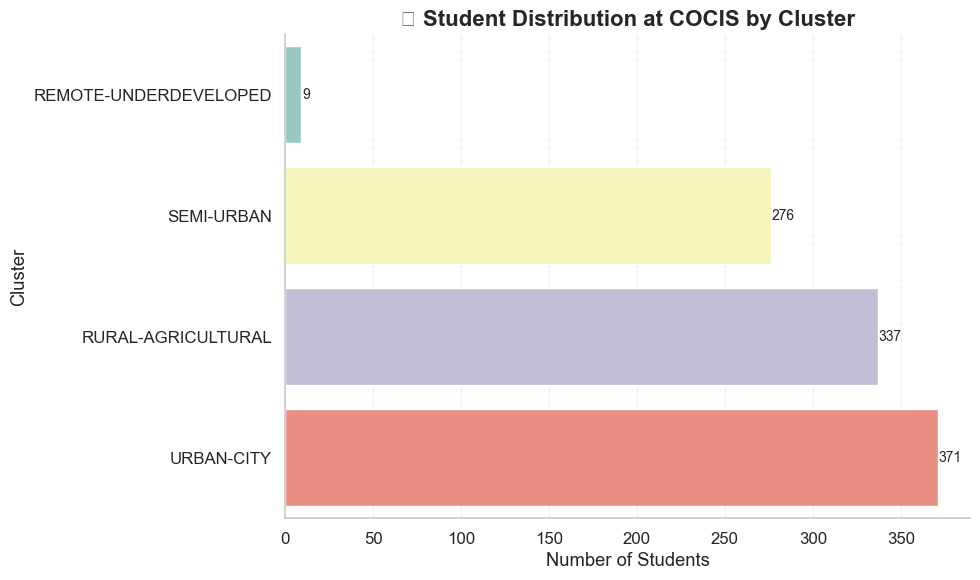

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for COCIS students
cocis_df = df[df['college'].str.upper() == 'COCIS']

# Group by cluster
cluster_counts = cocis_df['cluster'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set3', len(cluster_counts))

bar = sns.barplot(
    x=cluster_counts.values,
    y=cluster_counts.index,
    palette=colors
)

# Add number labels
for i, value in enumerate(cluster_counts.values):
    bar.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Labels and formatting
plt.title('💻 Student Distribution at COCIS by Cluster', fontsize=16, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Cluster')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname',
       'course_code', 'course_name', 'tot_wt', 'program_name', 'cluster',
       'region', 'college'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2914472432.py:29: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from current font.



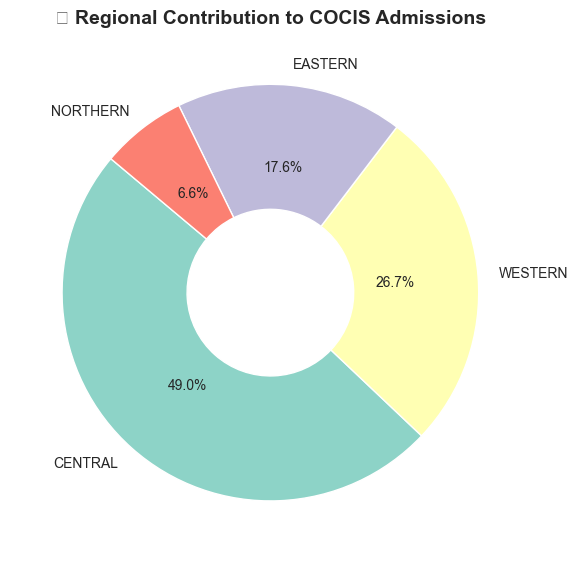

In [ ]:
import matplotlib.pyplot as plt

# Filter for COCIS students
cocis_df = df[df['college'].str.upper() == 'COCIS']

# Group by region
region_counts = cocis_df['region'].value_counts().sort_values(ascending=False)

# Plot donut
plt.figure(figsize=(6, 6))
colors = plt.cm.Set3.colors[:len(region_counts)]  # pleasant diverse colors

wedges, texts, autotexts = plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10},
    wedgeprops={'width': 0.6}  # Creates the donut
)

# Title
plt.title('🌐 Regional Contribution to COCIS Admissions', fontsize=14, weight='bold')

# Center circle for donut appearance
plt.gca().add_artist(plt.Circle((0, 0), 0.25, color='white'))

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3528773961.py:25: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.



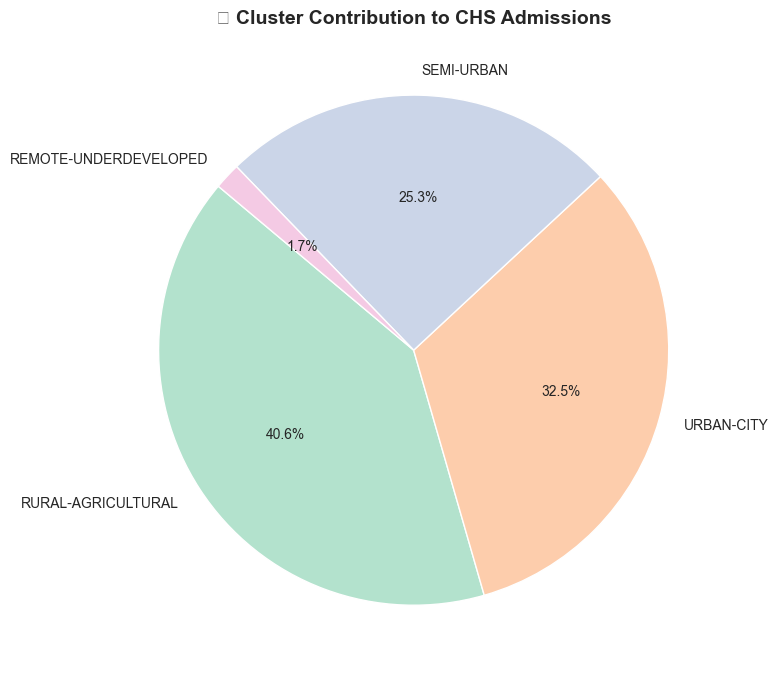

In [ ]:
import matplotlib.pyplot as plt

# Filter for CHS students
chs_df = df[df['college'].str.upper() == 'CHS']

# Count by cluster
cluster_counts = chs_df['cluster'].value_counts().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel2.colors[:len(cluster_counts)]  # soft palette

plt.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

# Title
plt.title('🧬 Cluster Contribution to CHS Admissions', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2303995890.py:25: UserWarning:

Glyph 128736 (\N{HAMMER AND WRENCH}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_8624\2303995890.py:25: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128736 (\N{HAMMER AND WRENCH}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



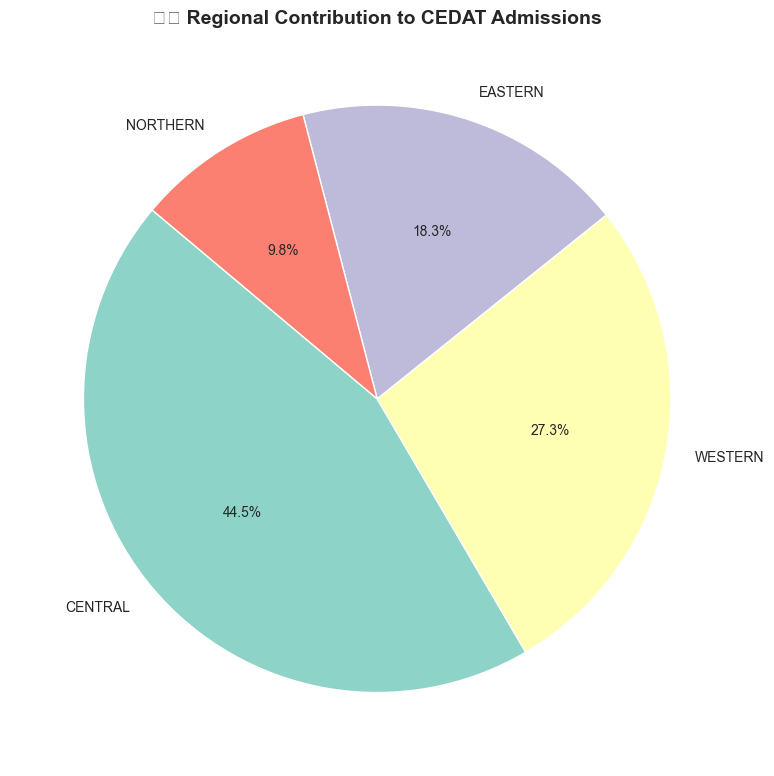

In [ ]:
import matplotlib.pyplot as plt

# Filter for CEDAT students
cedat_df = df[df['college'].str.upper() == 'CEDAT']

# Count by region
region_counts = cedat_df['region'].value_counts().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3.colors[:len(region_counts)]  # colorful but clear

plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

# Title
plt.title('🛠️ Regional Contribution to CEDAT Admissions', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2476837005.py:27: UserWarning:

Glyph 127973 (\N{HOSPITAL}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127973 (\N{HOSPITAL}) missing from current font.



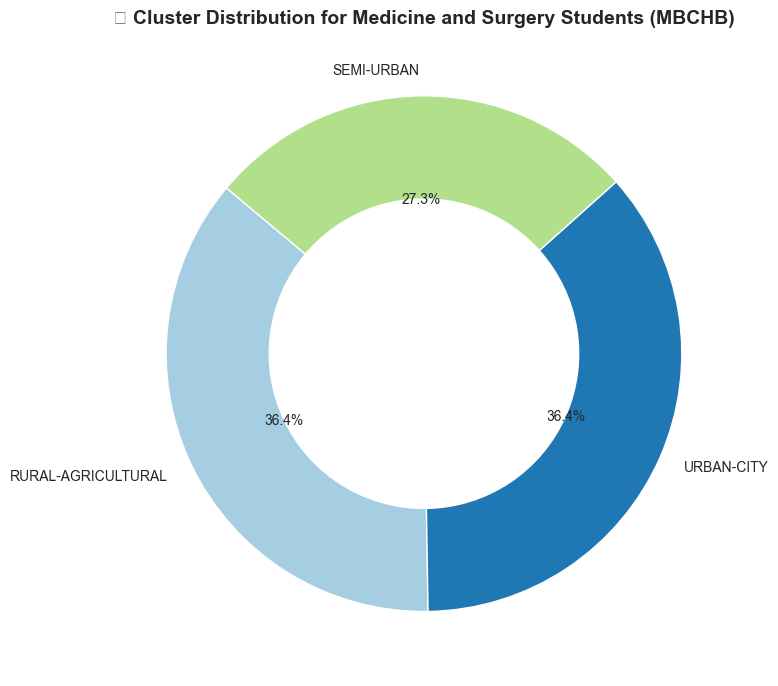

In [ ]:
import matplotlib.pyplot as plt

# Filter for MBCHB (Bachelor of Medicine and Bachelor of Surgery) students
mbchb_df = df[df['course_code'].str.upper() == 'MAM']

# Count how many per cluster
cluster_counts = mbchb_df['cluster'].value_counts()

# Plot donut chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors[:len(cluster_counts)]

# Create pie chart with a hole (donut)
wedges, texts, autotexts = plt.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 10}
)

# Add title
plt.title('🏥 Cluster Distribution for Medicine and Surgery Students (MBCHB)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\133400568.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_8624\133400568.py:33: UserWarning:

Glyph 127973 (\N{HOSPITAL}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127973 (\N{HOSPITAL}) missing from current font.



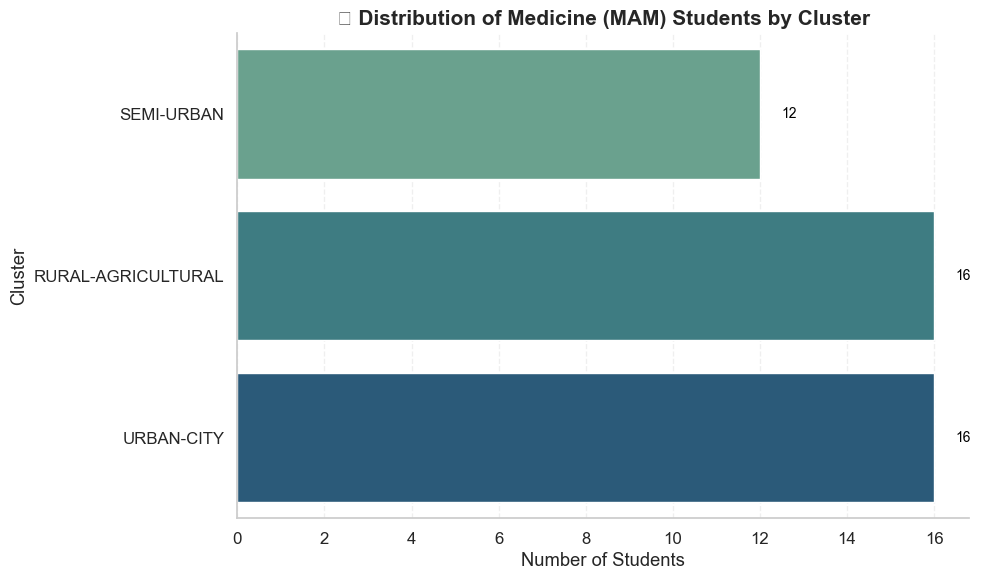

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Filter for Medicine and Surgery (MAM) students
mam_df = df[df['course_code'].str.upper() == 'MAM']

# Count by cluster
cluster_mam_counts = mam_df['cluster'].value_counts().sort_values()

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=cluster_mam_counts.values,
    y=cluster_mam_counts.index,
    palette='crest'  # Elegant blue-green gradient
)

# Add labels
for index, value in enumerate(cluster_mam_counts.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10, color='black')

# Title and labels
plt.title('🏥 Distribution of Medicine (MAM) Students by Cluster', fontsize=15, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Cluster')

# Tweak aesthetics
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3348450517.py:24: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.



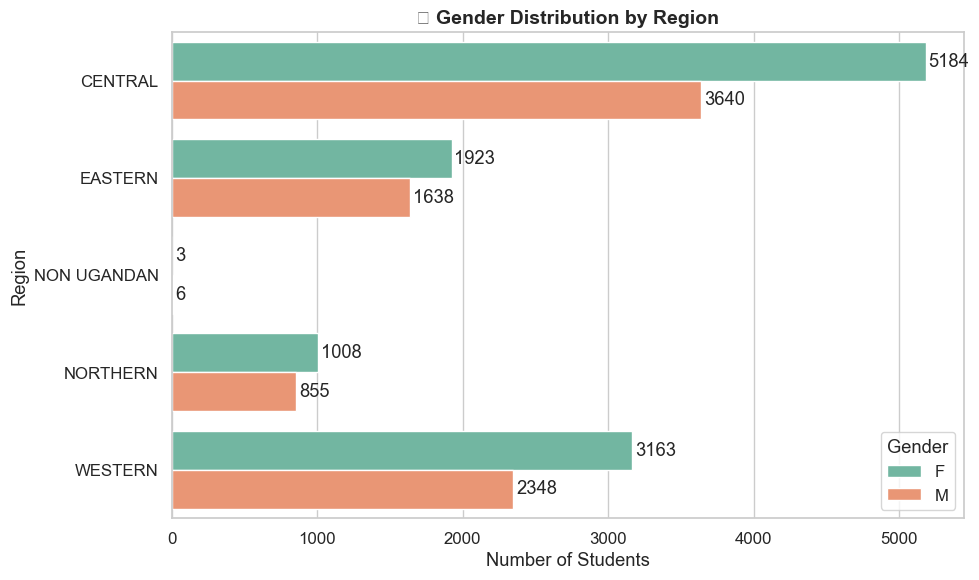

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
region_gender = df.groupby(['region', 'ge']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=region_gender,
    x='count', y='region', hue='ge',
    palette='Set2'
)

# Add number labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Labels and aesthetics
plt.title('👫 Gender Distribution by Region', fontsize=14, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Region')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1081860197.py:21: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.



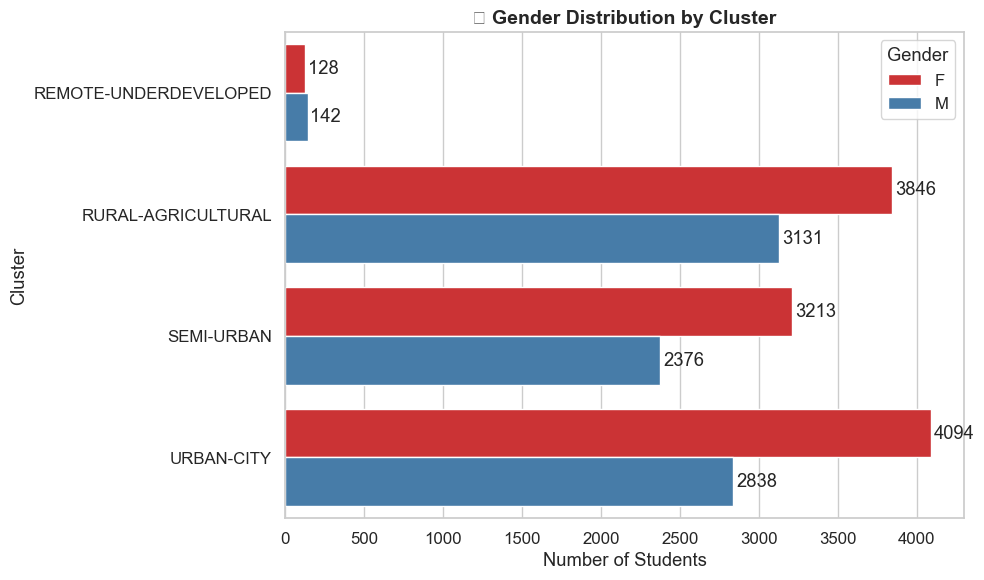

In [ ]:
# Prepare data
cluster_gender = df.groupby(['cluster', 'ge']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=cluster_gender,
    x='count', y='cluster', hue='ge',
    palette='Set1'
)

# Add number labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Labels and aesthetics
plt.title('👫 Gender Distribution by Cluster', fontsize=14, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Cluster')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\417870362.py:30: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.



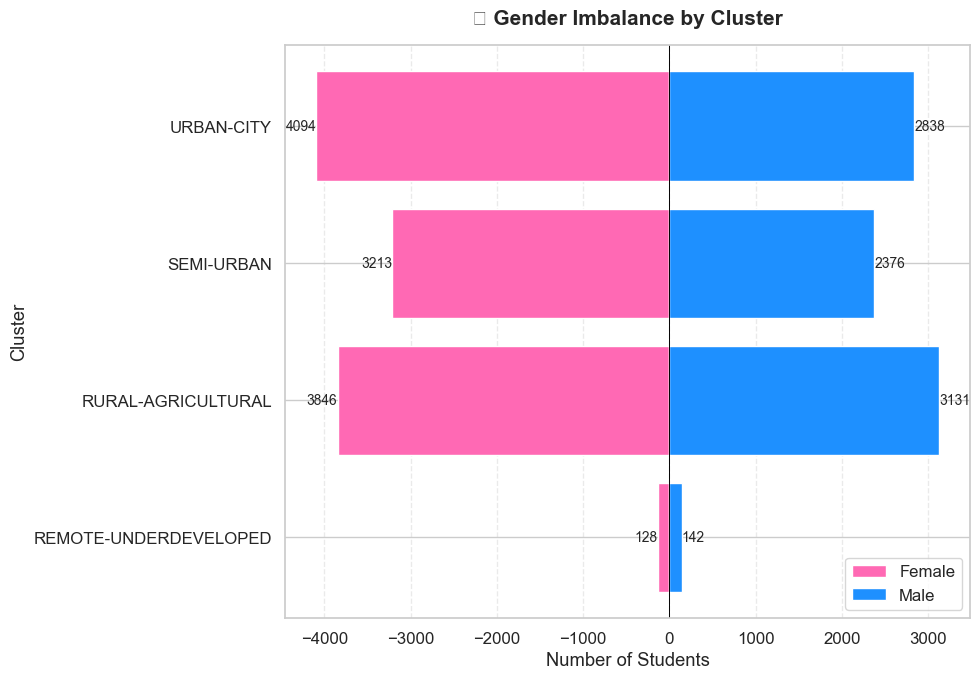

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
cluster_gender = df.groupby(['cluster', 'ge']).size().unstack(fill_value=0)
cluster_gender = cluster_gender[['F', 'M']]  # Ensure correct order
cluster_gender['F'] = -cluster_gender['F']  # Invert female values for diverging bars

# Plot
plt.figure(figsize=(10, 7))
bars_f = plt.barh(cluster_gender.index, cluster_gender['F'], color='#ff69b4', label='Female')
bars_m = plt.barh(cluster_gender.index, cluster_gender['M'], color='#1e90ff', label='Male')

# Add labels
for bar in bars_f:
    plt.text(bar.get_width() - 3, bar.get_y() + bar.get_height()/2, 
             f'{-int(bar.get_width())}', va='center', ha='right', fontsize=10)

for bar in bars_m:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=10)

# Customize axes and labels
plt.axvline(0, color='black', linewidth=0.7)
plt.title('👫 Gender Imbalance by Cluster', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Students')
plt.ylabel('Cluster')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3180413732.py:41: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



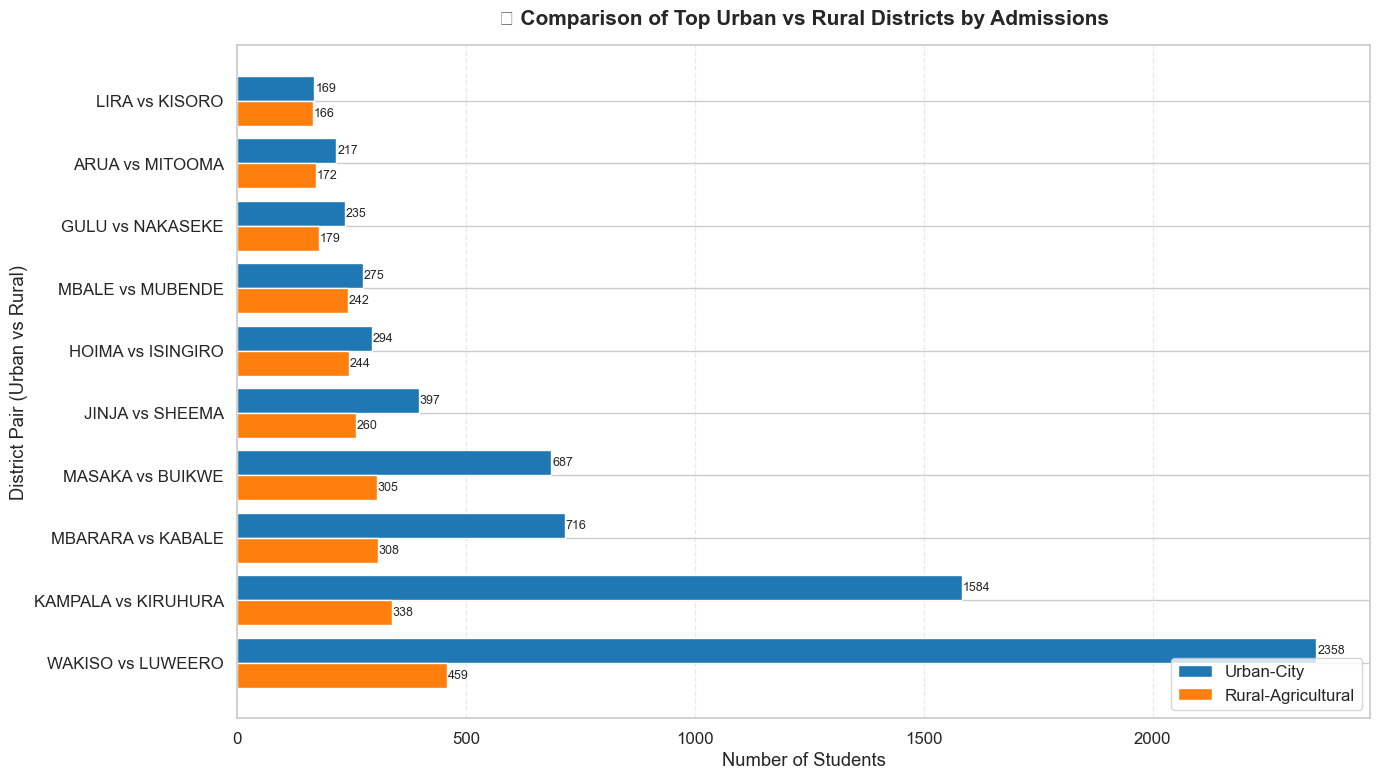

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 districts per cluster
urban_top = df[df['cluster'] == 'URBAN-CITY']['dname'].value_counts().head(10).sort_values(ascending=False)
rural_top = df[df['cluster'] == 'RURAL-AGRICULTURAL']['dname'].value_counts().head(10).sort_values(ascending=False)

# Combine with matching ranks
comparison_df = pd.DataFrame({
    'Urban District': urban_top.index.tolist(),
    'Urban Admissions': urban_top.values,
    'Rural District': rural_top.index.tolist(),
    'Rural Admissions': rural_top.values
})

# Plot side-by-side
plt.figure(figsize=(14, 8))
bar_width = 0.4
indices = range(len(comparison_df))

# Plot bars
plt.barh([i + bar_width/2 for i in indices], comparison_df['Urban Admissions'], 
         height=bar_width, label='Urban-City', color='#1f77b4')
plt.barh([i - bar_width/2 for i in indices], comparison_df['Rural Admissions'], 
         height=bar_width, label='Rural-Agricultural', color='#ff7f0e')

# Add value labels
for i, (ua, ra) in enumerate(zip(comparison_df['Urban Admissions'], comparison_df['Rural Admissions'])):
    plt.text(ua + 2, i + bar_width/2, str(ua), va='center', fontsize=9)
    plt.text(ra + 2, i - bar_width/2, str(ra), va='center', fontsize=9)

# Y-axis labels: use both district names
plt.yticks(indices, [f"{u} vs {r}" for u, r in zip(comparison_df['Urban District'], comparison_df['Rural District'])])

# Customize
plt.title('📊 Comparison of Top Urban vs Rural Districts by Admissions', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Students')
plt.ylabel('District Pair (Urban vs Rural)')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2973461901.py:43: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



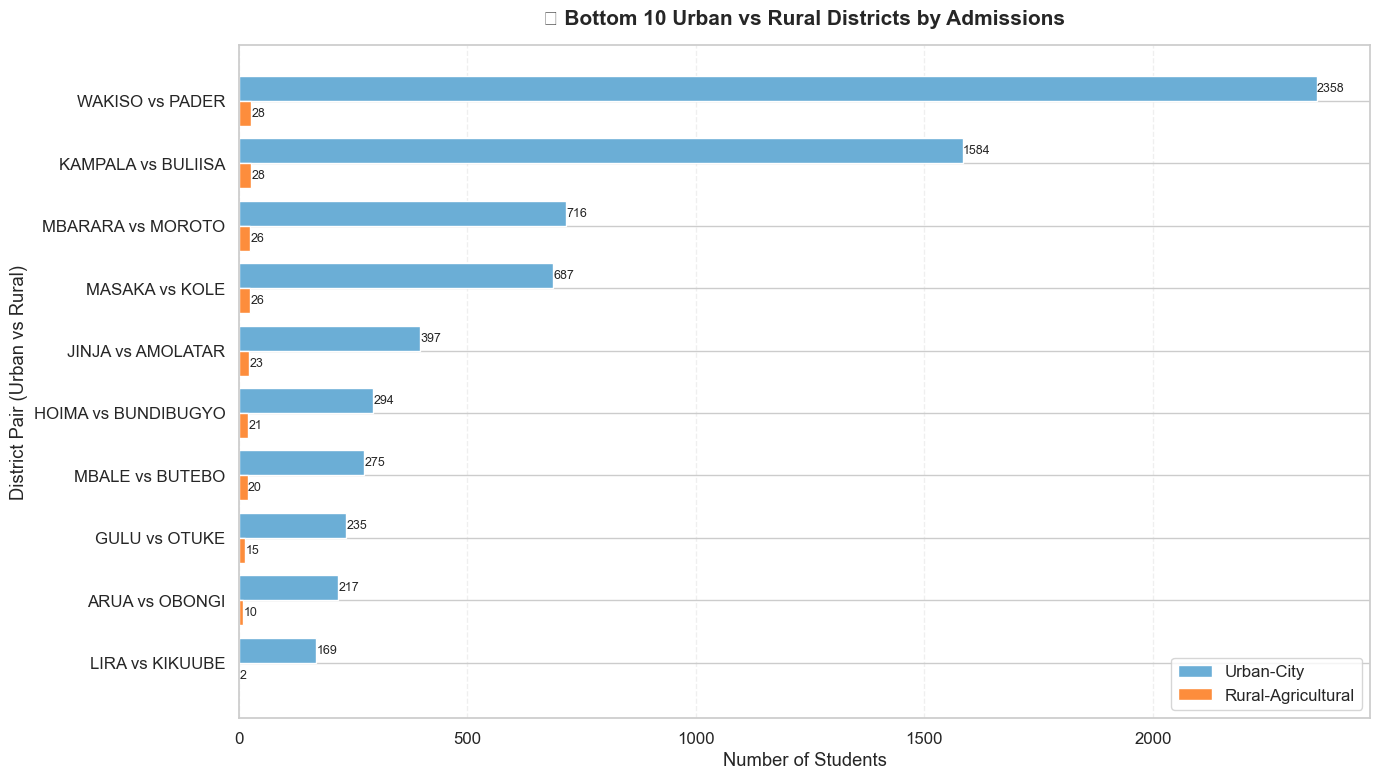

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get bottom 10 Urban-City districts by admission
urban_worst = df[df['cluster'] == 'URBAN-CITY']['dname'].value_counts().tail(10).sort_values(ascending=True)

# Get bottom 10 Rural-Agricultural districts by admission
rural_worst = df[df['cluster'] == 'RURAL-AGRICULTURAL']['dname'].value_counts().tail(10).sort_values(ascending=True)

# Combine into DataFrame
worst_df = pd.DataFrame({
    'Urban District': urban_worst.index.tolist(),
    'Urban Admissions': urban_worst.values,
    'Rural District': rural_worst.index.tolist(),
    'Rural Admissions': rural_worst.values
})

# Plotting side-by-side
plt.figure(figsize=(14, 8))
bar_width = 0.4
indices = range(len(worst_df))

# Plot bars
plt.barh([i + bar_width/2 for i in indices], worst_df['Urban Admissions'], 
         height=bar_width, color='#6baed6', label='Urban-City')
plt.barh([i - bar_width/2 for i in indices], worst_df['Rural Admissions'], 
         height=bar_width, color='#fd8d3c', label='Rural-Agricultural')

# Add number labels
for i, (ua, ra) in enumerate(zip(worst_df['Urban Admissions'], worst_df['Rural Admissions'])):
    plt.text(ua + 1, i + bar_width/2, str(ua), va='center', fontsize=9)
    plt.text(ra + 1, i - bar_width/2, str(ra), va='center', fontsize=9)

# Custom y-axis labels
plt.yticks(indices, [f"{u} vs {r}" for u, r in zip(worst_df['Urban District'], worst_df['Rural District'])])

# Title and axis formatting
plt.title('📉 Bottom 10 Urban vs Rural Districts by Admissions', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Students')
plt.ylabel('District Pair (Urban vs Rural)')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\2469060198.py:50: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_8624\2469060198.py:50: UserWarning:

Glyph 127793 (\N{SEEDLING}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127793 (\N{SEEDLING}) missing from current font.



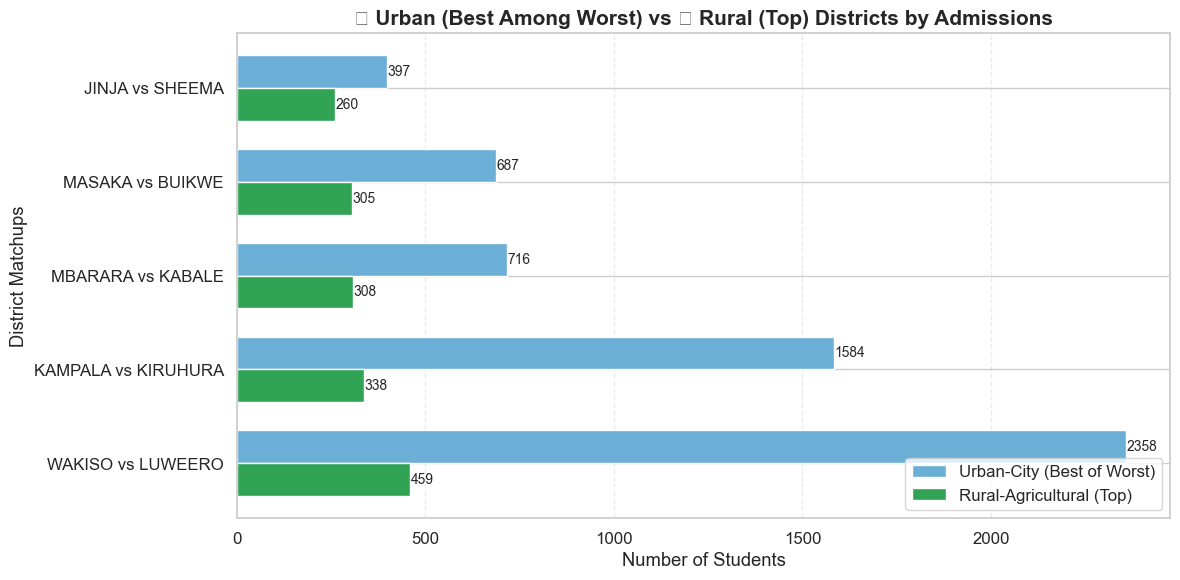

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Admissions by district
urban_adm = df[df['cluster'] == 'URBAN-CITY']['dname'].value_counts()
rural_adm = df[df['cluster'] == 'RURAL-AGRICULTURAL']['dname'].value_counts()

# Step 2: Get bottom 10 urban districts
urban_worst10 = urban_adm.tail(10)

# Step 3: From the bottom 10 urban, pick the top 5
urban_best_among_worst = urban_worst10.sort_values(ascending=False).head(5)

# Step 4: Get top 5 rural districts
rural_best5 = rural_adm.head(5)

# Step 5: Combine into one DataFrame for side-by-side comparison
compare_df = pd.DataFrame({
    'Urban District': urban_best_among_worst.index.tolist(),
    'Urban Admissions': urban_best_among_worst.values,
    'Rural District': rural_best5.index.tolist(),
    'Rural Admissions': rural_best5.values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = range(len(compare_df))

# Bars
plt.barh([i + bar_width/2 for i in indices], compare_df['Urban Admissions'], 
         height=bar_width, color='#6baed6', label='Urban-City (Best of Worst)')
plt.barh([i - bar_width/2 for i in indices], compare_df['Rural Admissions'], 
         height=bar_width, color='#31a354', label='Rural-Agricultural (Top)')

# Labels
for i, (ua, ra) in enumerate(zip(compare_df['Urban Admissions'], compare_df['Rural Admissions'])):
    plt.text(ua + 1, i + bar_width/2, str(ua), va='center', fontsize=10)
    plt.text(ra + 1, i - bar_width/2, str(ra), va='center', fontsize=10)

# Y-axis combined labels
plt.yticks(indices, [f"{u} vs {r}" for u, r in zip(compare_df['Urban District'], compare_df['Rural District'])])

# Titles and aesthetics
plt.title('🎯 Urban (Best Among Worst) vs 🌱 Rural (Top) Districts by Admissions', fontsize=15, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('District Matchups')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\728838147.py:43: UserWarning:

Glyph 127961 (\N{CITYSCAPE}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_8624\728838147.py:43: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_8624\728838147.py:43: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127961 (\N{CITYSCAPE}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from current font.



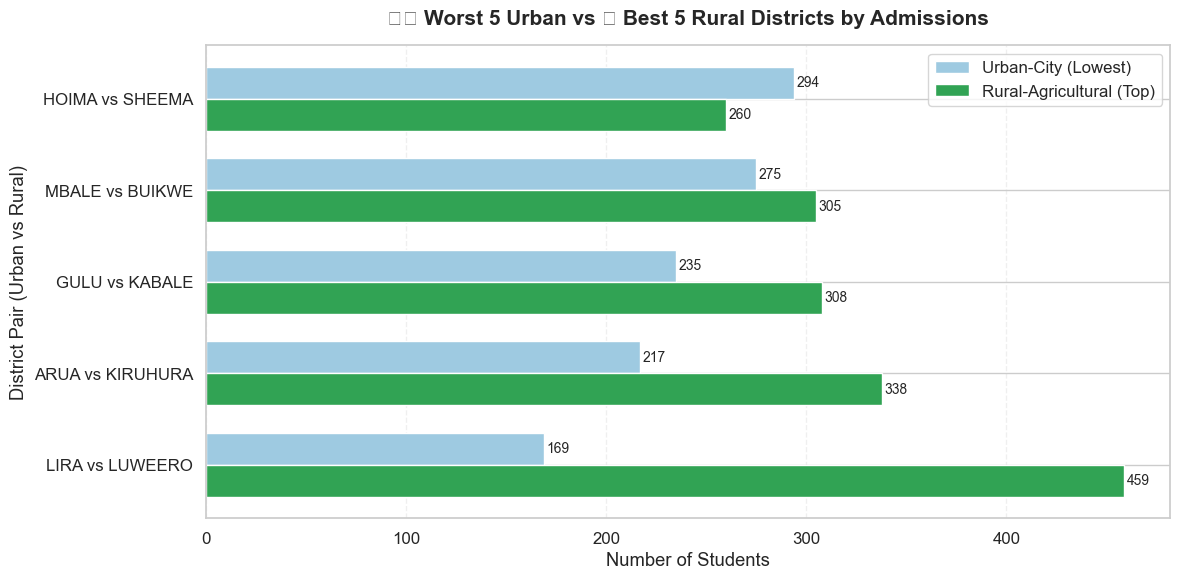

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Worst 5 Urban districts
urban_worst = df[df['cluster'] == 'URBAN-CITY']['dname'].value_counts().tail(5).sort_values(ascending=True)

# Best 5 Rural districts
rural_best = df[df['cluster'] == 'RURAL-AGRICULTURAL']['dname'].value_counts().head(5).sort_values(ascending=False)

# Combine into DataFrame
compare_df = pd.DataFrame({
    'Urban District': urban_worst.index.tolist(),
    'Urban Admissions': urban_worst.values,
    'Rural District': rural_best.index.tolist(),
    'Rural Admissions': rural_best.values
})

# Plotting side-by-side
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = range(len(compare_df))

# Bars
plt.barh([i + bar_width/2 for i in indices], compare_df['Urban Admissions'], 
         height=bar_width, color='#9ecae1', label='Urban-City (Lowest)')
plt.barh([i - bar_width/2 for i in indices], compare_df['Rural Admissions'], 
         height=bar_width, color='#31a354', label='Rural-Agricultural (Top)')

# Labels
for i, (ua, ra) in enumerate(zip(compare_df['Urban Admissions'], compare_df['Rural Admissions'])):
    plt.text(ua + 1, i + bar_width/2, str(ua), va='center', fontsize=10)
    plt.text(ra + 1, i - bar_width/2, str(ra), va='center', fontsize=10)

# Y-axis label pairs
plt.yticks(indices, [f"{u} vs {r}" for u, r in zip(compare_df['Urban District'], compare_df['Rural District'])])

# Titles and layout
plt.title('🏙️ Worst 5 Urban vs 🌾 Best 5 Rural Districts by Admissions', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Students')
plt.ylabel('District Pair (Urban vs Rural)')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


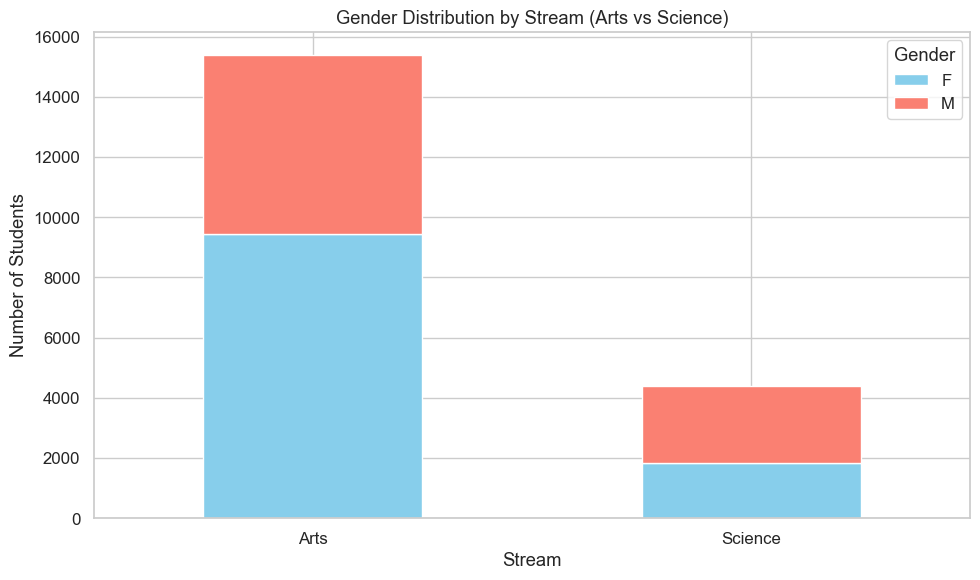

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your course-to-stream mapping
science_courses = {
    "CHS": ["BDS", "BDT", "BEH", "BLT", "BMR", "BOS", "BPT", "BYT", "MAM", "MLT", "NUR", "PHA", "BSL", 'SSM'],
    "COVAB": ["BJA", "BLB", "SCB", "SCP", "SCX", "VET"],
    "COBAMS": ["BPS", "BST", "BUS", "SAS", "STA"],
    "CoNAS": ["BBI", "BBP", "BBT", "BCB", "BIC", "SPS"],
    "COCIS": ["BIA", "BSI", "BSJ", "BSW", "CSC", "CSE", "CSJ", "IST", "JCA", "SSE"],
    "CAES": ["AGE", "AGM", "AGR", "BAI", "BEV", "BFS", "BGS", "BHD", "BIX", "BOF", "BUP", "BWE", "FST"],
    "CEDAT": ["ARC", "BFA", "BID", "BVC", "BVL", "CCE", "CIV", "ELE", "LSG", "MEC", "BPG", "SQS"]
}

arts_courses = {
    "COBAMS": ["ACC", "ADA", "ADJ", "ADM", "AML", "BBA", "BBC", "BBD", "BBE", "BBJ", "BHE", "BHJ", "BHM",
               "BIB", "BIM", "BJB", "BJJ", "BJO", "BJS", "BKE", "BLC", "BLM", "BMA", "BML", "BMM", "BMS",
               "BNE", "BNM", "BOM", "BPL", "BQE", "BRJ", "BRM", "BRO", "BSA", "BSF", "BSU", "BTB", "BTH",
               "BTT", "CEA", "CMM", "COB", "COE", "COM", "CRJ", "CRO", "ECE", "ECN", "ECO", "HMA", "HML",
               "HNM", "HOM", "HSJ", "HSO", "JAA", "JBE", "JOA", "MTM", "PMA", "PML", "PMM", "PNM", "PSC",
               "PSM", "PSU", "SEC", "TLM", "TTM"],
    "CHUSS": ["APS", "APY", "ARS", "ASE", "ASS", "BAC", "BAP", "BCE", "BEN", "BEY", "BJC", "BJE", "BLE",
              "BLG", "DPA", "LGM", "LIS", "MUS"],
    "LAW": ["LLB"],
    "CEES": ["BEC", "BYW", "EDA", "EDB", "EDP", "EEC", 'SPS'],
}

# Combine into a lookup dictionary
course_stream_map = {}

for stream, codes in science_courses.items():
    for code in codes:
        course_stream_map[code] = "Science"

for stream, codes in arts_courses.items():
    for code in codes:
        course_stream_map[code] = "Arts"

# Load your Excel data (update file name/path if necessary)
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

# Ensure necessary columns exist
if 'course_code' not in df.columns or 'ge' not in df.columns:
    raise ValueError("Expected columns 'course_code' and 'gender' not found in dataset.")

# Map course_code to 'stream'
df['stream'] = df['course_code'].map(course_stream_map)

# Drop any records that couldn't be mapped
df = df.dropna(subset=['stream'])

# Group by stream and gender
grouped = df.groupby(['stream', 'ge']).size().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))
plt.title('Gender Distribution by Stream (Arts vs Science)')
plt.xlabel('Stream')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


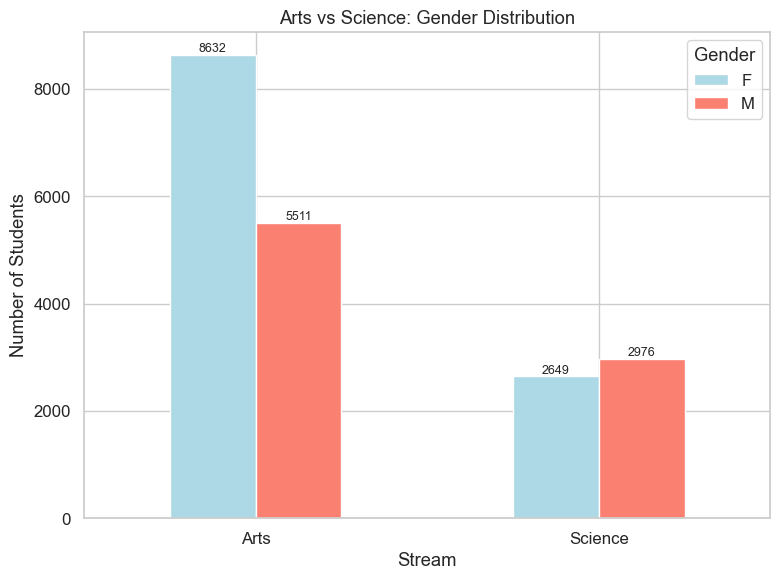

In [ ]:
import matplotlib.pyplot as plt

# Define course to stream mapping
science_courses = [
    "BDS", "BDT", "BEH", "BLT", "BMR", "BOS", "BPT", "BYT", "MAM", "MLT", "NUR", "PHA", "BSL", "SSM",
    "BEC", "BYW", "EDA", "EDB", "EDP", "EEC", "SPS",
    "BJA", "BLB", "SCB", "SCP", "SCX", "VET",
    "BPS", "BST", "BUS", "SAS", "STA",
    "BBI", "BBP", "BBT", "BCB", "BIC",
    "BIA", "BSI", "BSJ", "BSW", "CSC", "CSE", "CSJ", "IST", "JCA", "SSE",
    "AGE", "AGM", "AGR", "BAI", "BEV", "BFS", "BGS", "BHD", "BIX", "BOF", "BUP", "BWE", "FST",
    "ARC", "BFA", "BID", "BVC", "BVL", "CCE", "CIV", "ELE", "LSG", "MEC", "BPG", "SQS"
]

arts_courses = [
    "ACC", "ADA", "ADJ", "ADM", "AML", "BBA", "BBC", "BBD", "BBE", "BBJ", "BHE", "BHJ", "BHM",
    "BIB", "BIM", "BJB", "BJJ", "BJO", "BJS", "BKE", "BLC", "BLM", "BMA", "BML", "BMM", "BMS",
    "BNE", "BNM", "BOM", "BPL", "BQE", "BRJ", "BRM", "BRO", "BSA", "BSF", "BSU", "BTB", "BTH",
    "BTT", "CEA", "CMM", "COB", "COE", "COM", "CRJ", "CRO", "ECE", "ECN", "ECO", "HMA", "HML",
    "HNM", "HOM", "HSJ", "HSO", "JAA", "JBE", "JOA", "MTM", "PMA", "PML", "PMM", "PNM", "PSC",
    "PSM", "PSU", "SEC", "TLM", "TTM",
    "APS", "APY", "ARS", "ASE", "ASS", "BAC", "BAP", "BCE", "BEN", "BEY", "BJC", "BJE", "BLE",
    "BLG", "DPA", "LGM", "LIS", "MUS"
]

# Create a mapping
df['stream'] = df['course_code'].apply(
    lambda x: 'Science' if x in science_courses else 'Arts' if x in arts_courses else None
)

# Drop unmatched
df = df.dropna(subset=['stream', 'ge'])

# Group by stream and gender
grouped = df.groupby(['stream', 'ge']).size().unstack(fill_value=0)

# Bar plot
ax = grouped.plot(kind='bar', color=['lightblue', 'salmon'], figsize=(8,6))
plt.title('Arts vs Science: Gender Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Stream')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add number labels
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3829134996.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



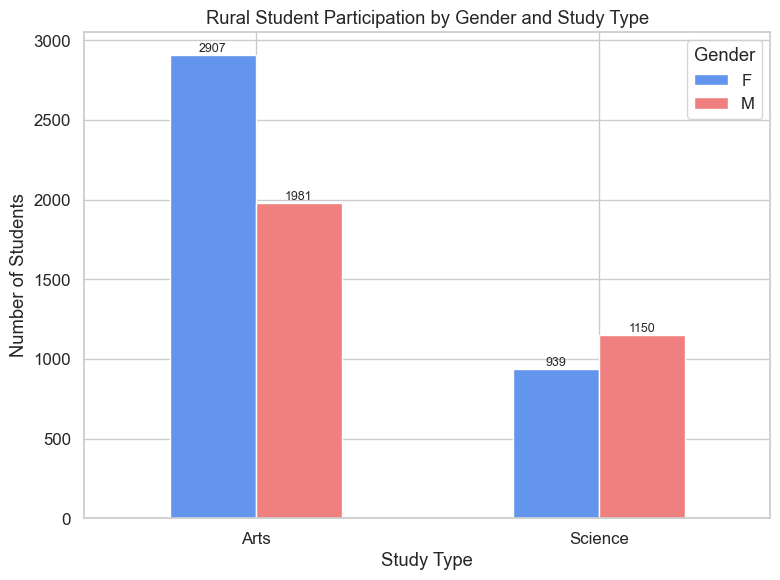

In [ ]:
# Filter rural students
rural_df = df[df['cluster'] == 'RURAL-AGRICULTURAL']

# Separate into sciences and arts
rural_df['study_type'] = rural_df['course_code'].apply(lambda x: 'Science' if x in science_courses else ('Arts' if x in arts_courses else 'Other'))

# Filter only science and arts
rural_df_filtered = rural_df[rural_df['study_type'].isin(['Science', 'Arts'])]

# Group by study type and gender
study_gender_counts = rural_df_filtered.groupby(['study_type', 'ge']).size().unstack().fillna(0)

# Plot
ax = study_gender_counts.plot(kind='bar', figsize=(8, 6), color=['cornflowerblue', 'lightcoral'])
plt.title('Rural Student Participation by Gender and Study Type')
plt.ylabel('Number of Students')
plt.xlabel('Study Type')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\3632882013.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



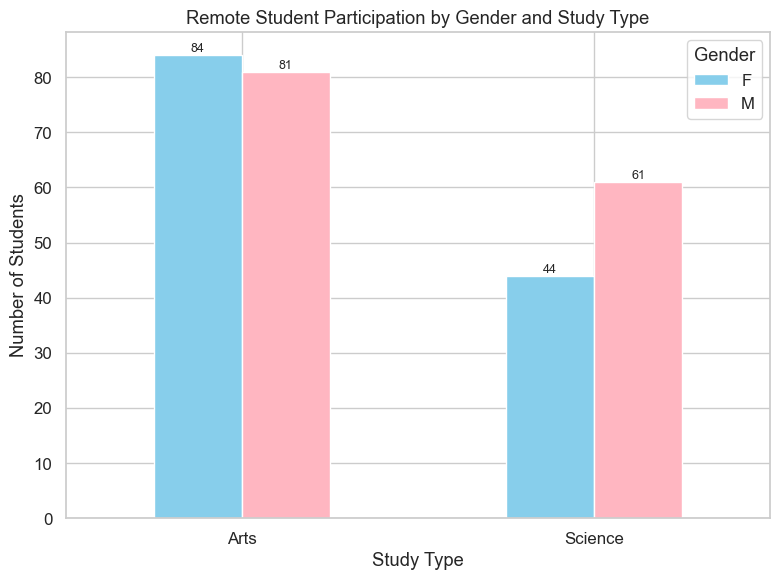

In [ ]:
# Filter remote students
remote_df = df[df['cluster'] == 'REMOTE-UNDERDEVELOPED']

# Classify study type
remote_df['study_type'] = remote_df['course_code'].apply(
    lambda x: 'Science' if x in science_courses else ('Arts' if x in arts_courses else 'Other')
)

# Filter only science and arts
remote_df_filtered = remote_df[remote_df['study_type'].isin(['Science', 'Arts'])]

# Group by study type and gender
remote_study_gender_counts = remote_df_filtered.groupby(['study_type', 'ge']).size().unstack().fillna(0)

# Plot
ax = remote_study_gender_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])
plt.title('Remote Student Participation by Gender and Study Type')
plt.ylabel('Number of Students')
plt.xlabel('Study Type')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add number labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


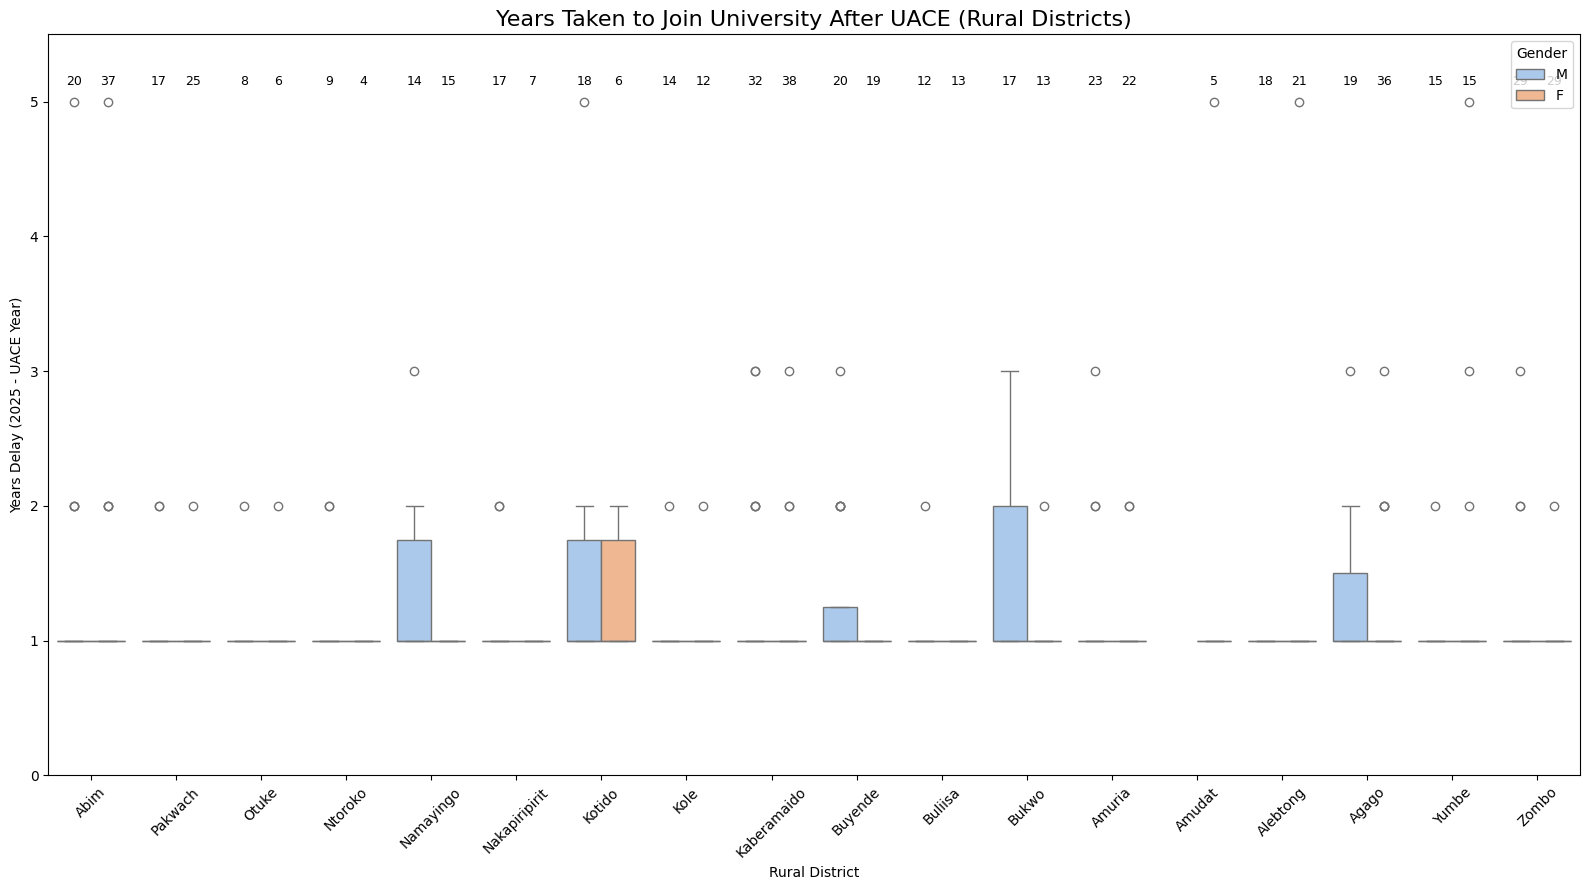

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load dataset
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

# STEP 2: Define rural districts
rural_districts = [
    'Nakapiripirit', 'Amudat', 'Kotido', 'Abim', 'Buliisa', 'Bukwo', 'Kaberamaido',
    'Buyende', 'Namayingo', 'Ntoroko', 'Yumbe', 'Madi-Okollo', 'Agago', 'Alebtong',
    'Otuke', 'Amuria', 'Kole', 'Pakwach', 'Kwania', 'Zombo'
]

# STEP 3: Filter and clean
df['dname'] = df['dname'].astype(str).str.title()
df['uace_'] = pd.to_numeric(df['uace_'], errors='coerce')
df['ge'] = df['ge'].astype(str).str.upper()

rural_df = df[df['dname'].isin(rural_districts)].copy()
rural_df = rural_df[rural_df['uace_'].notnull()]
rural_df['Gap_Years'] = 2025 - rural_df['uace_']
rural_df = rural_df[(rural_df['Gap_Years'] >= 0) & (rural_df['Gap_Years'] <= 5)]

# STEP 4: Sort districts by median delay
district_order = rural_df.groupby('dname')['Gap_Years'].median().sort_values().index

# STEP 5: Visualization with gender variation
plt.figure(figsize=(16, 9))
sns.boxplot(data=rural_df, x='dname', y='Gap_Years', hue='ge', order=district_order, palette='pastel')

# Add student count labels above each box
counts = rural_df.groupby(['dname', 'ge']).size().reset_index(name='count')
for i, (district, ge, count) in enumerate(zip(counts['dname'], counts['ge'], counts['count'])):
    # Get index in current district order
    try:
        x = list(district_order).index(district) + (0.2 if ge == 'F' else -0.2)
        plt.text(x, 5.1, str(count), ha='center', va='bottom', fontsize=9, color='black')
    except:
        pass

plt.title('Years Taken to Join University After UACE (Rural Districts)', fontsize=16)
plt.xlabel('Rural District')
plt.ylabel('Years Delay (2025 - UACE Year)')
plt.xticks(rotation=45)
plt.ylim(0, 5.5)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


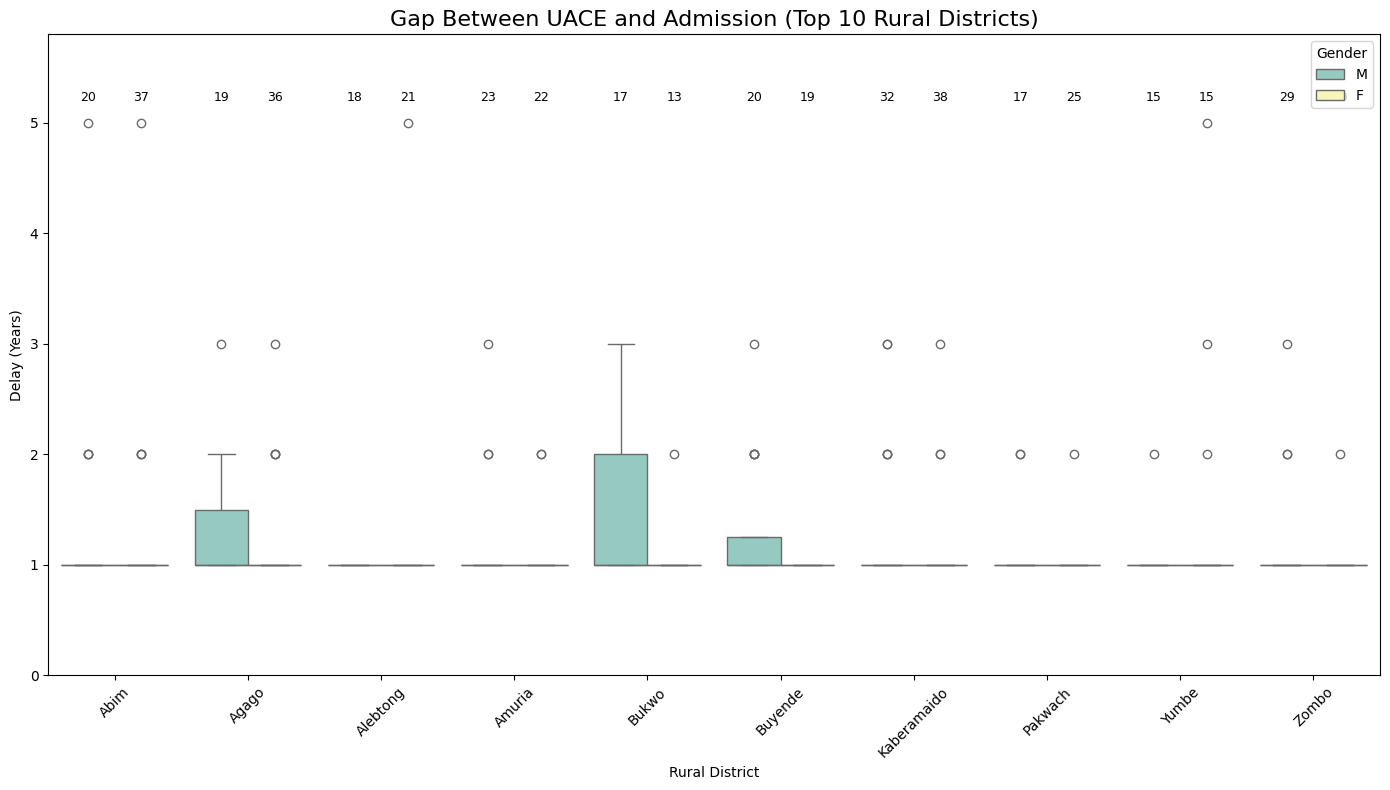

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

# Define rural districts
rural_districts = [
    'Nakapiripirit', 'Amudat', 'Kotido', 'Abim', 'Buliisa', 'Bukwo', 'Kaberamaido',
    'Buyende', 'Namayingo', 'Ntoroko', 'Yumbe', 'Madi-Okollo', 'Agago', 'Alebtong',
    'Otuke', 'Amuria', 'Kole', 'Pakwach', 'Kwania', 'Zombo'
]

# Clean data
df['dname'] = df['dname'].astype(str).str.title()
df['uace_'] = pd.to_numeric(df['uace_'], errors='coerce')
df['ge'] = df['ge'].astype(str).str.upper()

rural_df = df[df['dname'].isin(rural_districts)].copy()
rural_df = rural_df[rural_df['uace_'].notnull()]
rural_df['Gap_Years'] = 2025 - rural_df['uace_']
rural_df = rural_df[(rural_df['Gap_Years'] >= 0) & (rural_df['Gap_Years'] <= 5)]

# Top 10 rural districts by number of students
top_rural_districts = (
    rural_df['dname'].value_counts()
    .nlargest(10)
    .index
    .tolist()
)
rural_df = rural_df[rural_df['dname'].isin(top_rural_districts)]

# Sort by median gap
district_order = rural_df.groupby('dname')['Gap_Years'].median().sort_values().index

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=rural_df, x='dname', y='Gap_Years', hue='ge', order=district_order, palette='Set3')

# Add count labels
counts = rural_df.groupby(['dname', 'ge']).size().reset_index(name='count')
for _, row in counts.iterrows():
    d, s, c = row['dname'], row['ge'], row['count']
    try:
        x = list(district_order).index(d) + (0.2 if s == 'F' else -0.2)
        plt.text(x, 5.2, str(c), ha='center', fontsize=9, color='black')
    except:
        continue

plt.title('Gap Between UACE and Admission (Top 10 Rural Districts)', fontsize=16)
plt.xlabel('Rural District')
plt.ylabel('Delay (Years)')
plt.ylim(0, 5.8)
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()
